In [1]:
import pandas as pd
import numpy as np
import joblib
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format='retina'

# Obtain $y$

In [2]:
root = '/net/leksai/nips/result/fmnist'
# recall_rec = pd.read_pickle(Path(root)/'recall_df_{}_90.pkl'.format(0))['Reconstruction Model']
recall_oc = pd.read_pickle(Path(root)/'recall_df_{}_90.pkl'.format(0))['One Class Model']

In [3]:
recall_oc

A/N = 0  A/N = 0.1, Abnormal: 1  A/N = 0.1, Abnormal: 2  \
1    0.590                   0.998                   0.061   
2    0.305                   0.389                   0.969   
3    0.360                   0.742                   0.238   
4    0.371                   0.399                   0.960   
5    0.635                   0.775                   0.520   
6    0.229                   0.283                   0.659   
7    0.903                   0.961                   0.554   
8    0.870                   0.825                   0.834   
9    0.995                   0.998                   0.961   

   A/N = 0.1, Abnormal: 3  A/N = 0.1, Abnormal: 4  A/N = 0.1, Abnormal: 5  \
1                   0.837                   0.306                   0.669   
2                   0.120                   0.956                   0.300   
3                   0.968                   0.454                   0.391   
4                   0.322                   0.994                   0.229   
5                   0.507                   0.586                   1.000   
6                   0.236                   0.671                   0.239   
7                   0.495                   0.687                   1.000   
8                   0.587                   0.888                   0.934   
9                   0.933                   0.985                   1.000   

   A/N = 0.1, Abnormal: 6  A/N = 0.1, Abnormal: 7  A/N = 0.1, Abnormal: 8  \
1                   0.075                   0.460                   0.542   
2                   0.928                   0.387                   0.538   
3                   0.220                   0.367                   0.444   
4                   0.940                   0.321                   0.598   
5                   0.399                   0.999                   0.995   
6                   0.769                   0.295                   0.390   
7                   0.203                   1.000                   1.000   
8                   0.600                   0.972                   1.000   
9                   0.847                   1.000                   1.000   

   A/N = 0.1, Abnormal: 9  
1                   0.382  
2                   0.649  
3                   0.317  
4                   0.670  
5                   0.987  
6                   0.416  
7                   1.000  
8                   0.974  
9                   1.000

In [4]:
y_un = {k: {} for k in range(1, 10)}
y_semi = {k: {} for k in range(1, 10)}

In [5]:
# y_un[i] refers to the unsupervised results on test abnormal i
# y_semi[i] refers to the semi-supervised results on test abnormal i

for i in range(1, 10):
    y_un[i] = [recall_oc.loc[i, :][0]] * 9
    y_semi[i] = list(recall_oc.loc[i, :][1:])

In [6]:
y_un

{1: [0.59, 0.59, 0.59, 0.59, 0.59, 0.59, 0.59, 0.59, 0.59],
 2: [0.305, 0.305, 0.305, 0.305, 0.305, 0.305, 0.305, 0.305, 0.305],
 3: [0.36, 0.36, 0.36, 0.36, 0.36, 0.36, 0.36, 0.36, 0.36],
 4: [0.371, 0.371, 0.371, 0.371, 0.371, 0.371, 0.371, 0.371, 0.371],
 5: [0.635, 0.635, 0.635, 0.635, 0.635, 0.635, 0.635, 0.635, 0.635],
 6: [0.229, 0.229, 0.229, 0.229, 0.229, 0.229, 0.229, 0.229, 0.229],
 7: [0.903, 0.903, 0.903, 0.903, 0.903, 0.903, 0.903, 0.903, 0.903],
 8: [0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87],
 9: [0.995, 0.995, 0.995, 0.995, 0.995, 0.995, 0.995, 0.995, 0.995]}

In [7]:
y_semi

{1: [0.998, 0.061, 0.837, 0.306, 0.669, 0.075, 0.46, 0.542, 0.382],
 2: [0.389, 0.969, 0.12, 0.956, 0.3, 0.928, 0.387, 0.538, 0.649],
 3: [0.742, 0.238, 0.968, 0.454, 0.391, 0.22, 0.367, 0.444, 0.317],
 4: [0.399, 0.96, 0.322, 0.994, 0.229, 0.94, 0.321, 0.598, 0.67],
 5: [0.775, 0.52, 0.507, 0.586, 1.0, 0.399, 0.999, 0.995, 0.987],
 6: [0.283, 0.659, 0.236, 0.671, 0.239, 0.769, 0.295, 0.39, 0.416],
 7: [0.961, 0.554, 0.495, 0.687, 1.0, 0.203, 1.0, 1.0, 1.0],
 8: [0.825, 0.834, 0.587, 0.888, 0.934, 0.6, 0.972, 1.0, 0.974],
 9: [0.998, 0.961, 0.933, 0.985, 1.0, 0.847, 1.0, 1.0, 1.0]}

# Obtain $x$

In [14]:
div_joint_oc = joblib.load('div_joint_oc.pkl')
div_margin_oc = joblib.load('div_margin_oc.pkl')

In [15]:
name_list = ['tshirt', 'trouser', 'pullover', 'dress', 'coat',
             'sandal', 'shirt', 'sneaker', 'bag', 'boot']

In [16]:
x_joint = {k: {} for k in range(1, 10)}
x_margin = {k: {} for k in range(1, 10)}

In [17]:
for i in range(1, 10):
    name = name_list[i]
    x_joint[i] = list(div_joint_oc[name].values())
    x_margin[i] = list(div_margin_oc[name].values())

In [18]:
x_joint

{1: [0.1571087161617828,
  9.578044624604189,
  8.435332939404379,
  9.885738114828666,
  11.138274194993901,
  8.208346152621159,
  16.782071631894926,
  13.058282679278186,
  20.68067429002034],
 2: [10.937138640217977,
  0.09322807240125774,
  5.203458860230839,
  2.1962844761785565,
  6.517230272561263,
  1.4857815098930063,
  12.091194118059896,
  8.422187478141355,
  17.90433590437849],
 3: [9.229389758393864,
  4.711873061623393,
  0.05129686430396729,
  4.6907173957023796,
  6.296004212188136,
  3.365612247946571,
  11.9217325083708,
  8.25638757945267,
  17.033836609152424],
 4: [11.23399642196797,
  1.7190069211965249,
  5.105028695547123,
  -0.07695307998288259,
  7.069381306341782,
  1.5625895406929406,
  12.574988594155178,
  8.665327614969,
  18.589609072601885],
 5: [12.874324556640294,
  6.742940666327918,
  7.003115121491666,
  7.288382820730648,
  -0.0685062039040445,
  5.475090048856415,
  7.051504801817246,
  9.691737475513623,
  13.20439466041716],
 6: [9.650102330

In [19]:
x_margin

{1: [26.376290702408376,
  12.567945190595136,
  11.093738491689127,
  13.631381574734245,
  20.81608432288214,
  5.8416629878152335,
  33.400634372643445,
  25.45356919663699,
  50.39134410773303],
 2: [26.376290702408376,
  12.567945190595136,
  11.093738491689127,
  13.631381574734245,
  20.81608432288214,
  5.8416629878152335,
  33.400634372643445,
  25.45356919663699,
  50.39134410773303],
 3: [26.376290702408376,
  12.567945190595136,
  11.093738491689127,
  13.631381574734245,
  20.81608432288214,
  5.8416629878152335,
  33.400634372643445,
  25.45356919663699,
  50.39134410773303],
 4: [26.376290702408376,
  12.567945190595136,
  11.093738491689127,
  13.631381574734245,
  20.81608432288214,
  5.8416629878152335,
  33.400634372643445,
  25.45356919663699,
  50.39134410773303],
 5: [26.376290702408376,
  12.567945190595136,
  11.093738491689127,
  13.631381574734245,
  20.81608432288214,
  5.8416629878152335,
  33.400634372643445,
  25.45356919663699,
  50.39134410773303],
 6: [

# Draw Plots for Joint Divergence

In [20]:
margin_test_for_tshirt = joblib.load('margin_test_for_tshirt_oc.pkl')

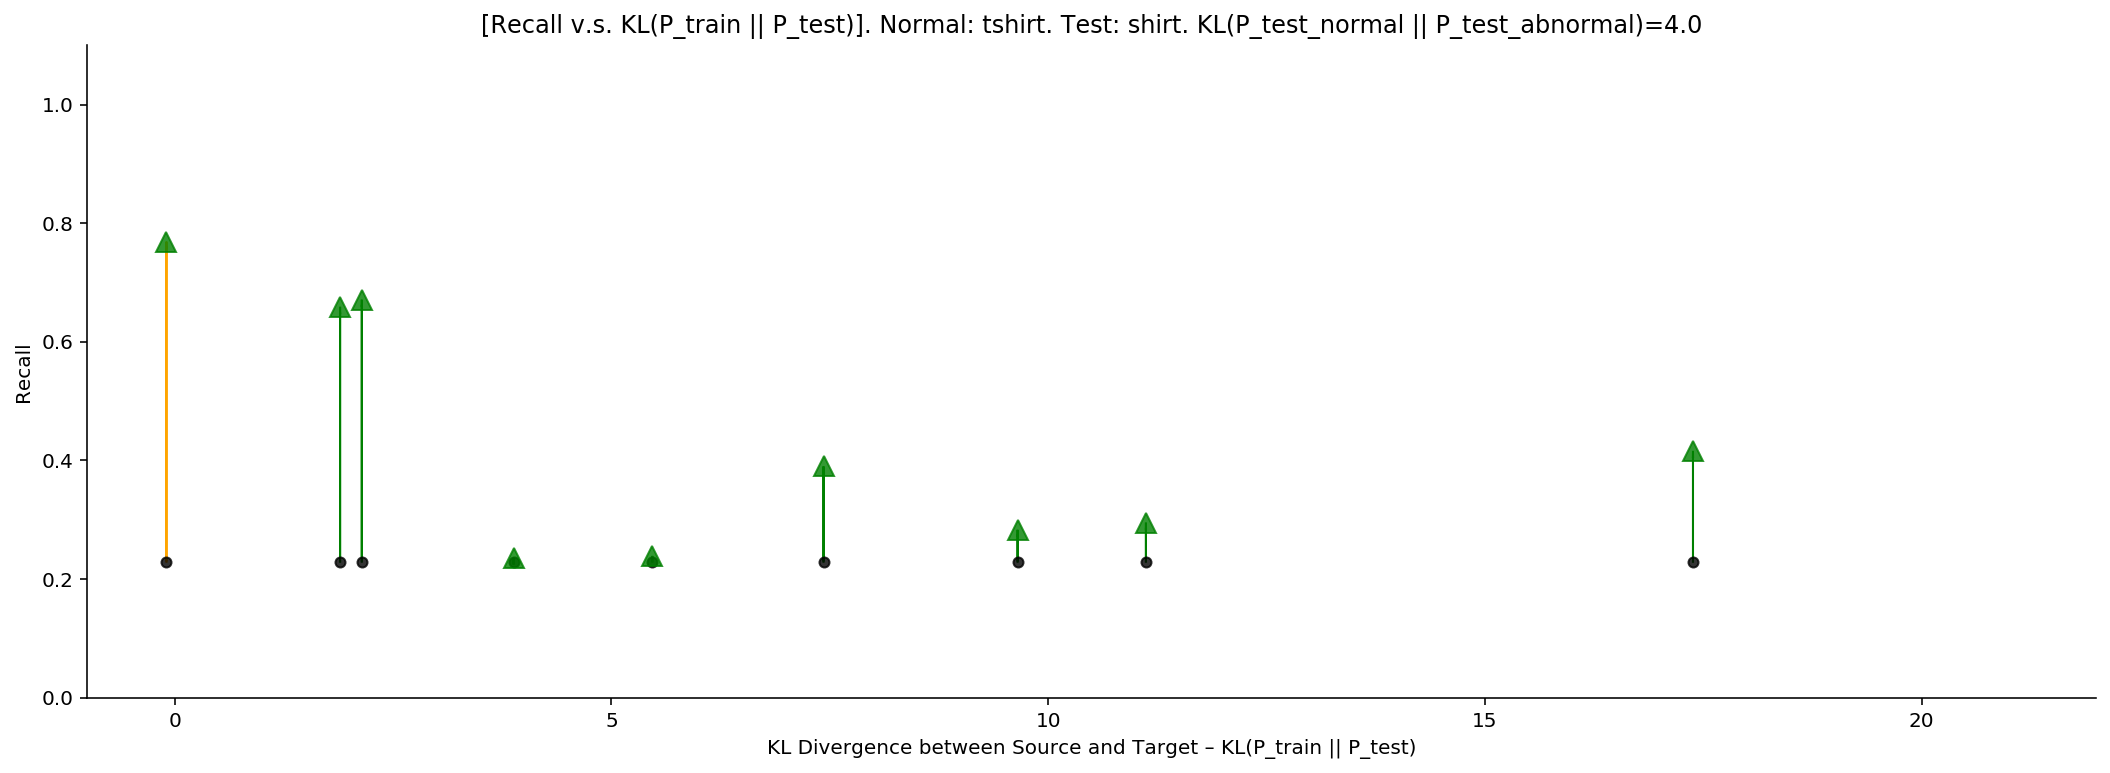

In [82]:
i = 6
y0 = np.array(y_un[i])
y1 = np.array(y_semi[i])
joint_x = np.array(x_joint[i])
margin_x = np.array(x_margin[i])

dy = y1 - y0
pos_ind = np.where(dy >= 0)[0]
nega_ind = np.where(dy < 0)[0]

plt.figure(figsize=(18, 6))
plt.plot(joint_x[pos_ind], y0[pos_ind], '.', color='black', markersize=10, alpha=0.8)
plt.plot(joint_x[nega_ind], y0[nega_ind], '.', color='black', markersize=10, alpha=0.8)
plt.plot(joint_x[pos_ind], y1[pos_ind], '^', color='green', markersize=10, alpha=0.8)
plt.plot(joint_x[nega_ind], y1[nega_ind], 'v', color='red', markersize=10, alpha=0.8)


for j in range(len(y0)):
    # The follow line only works when normal = 0
    if i == j + 1:
        plt.arrow(joint_x[j], y0[j], 0, y1[j] - y0[j],
              width=0.001, length_includes_head=True, head_length=0.01, color='orange')  
    elif y0[j]-y1[j] >= 0:
        plt.arrow(joint_x[j], y0[j], 0, y1[j] - y0[j],
              width=0.001, length_includes_head=True, head_length=0.01, color='red')
    else:
        plt.arrow(joint_x[j], y0[j], 0, y1[j]-y0[j],
              width=0.001, length_includes_head=True, head_length=0.01, color='green')

sns.despine()
plt.ylabel('Recall')
plt.xlabel('KL Divergence between Source and Target – KL(P_train || P_test)')
plt.title('[Recall v.s. KL(P_train || P_test)]. Normal: tshirt. Test: {}. KL(P_test_normal || P_test_abnormal)={}'.format(name_list[i], round(margin_test_for_tshirt[i], 1)))
plt.ylim(0, 1.1)
plt.xlim(-1, 22)
plt.show()

2

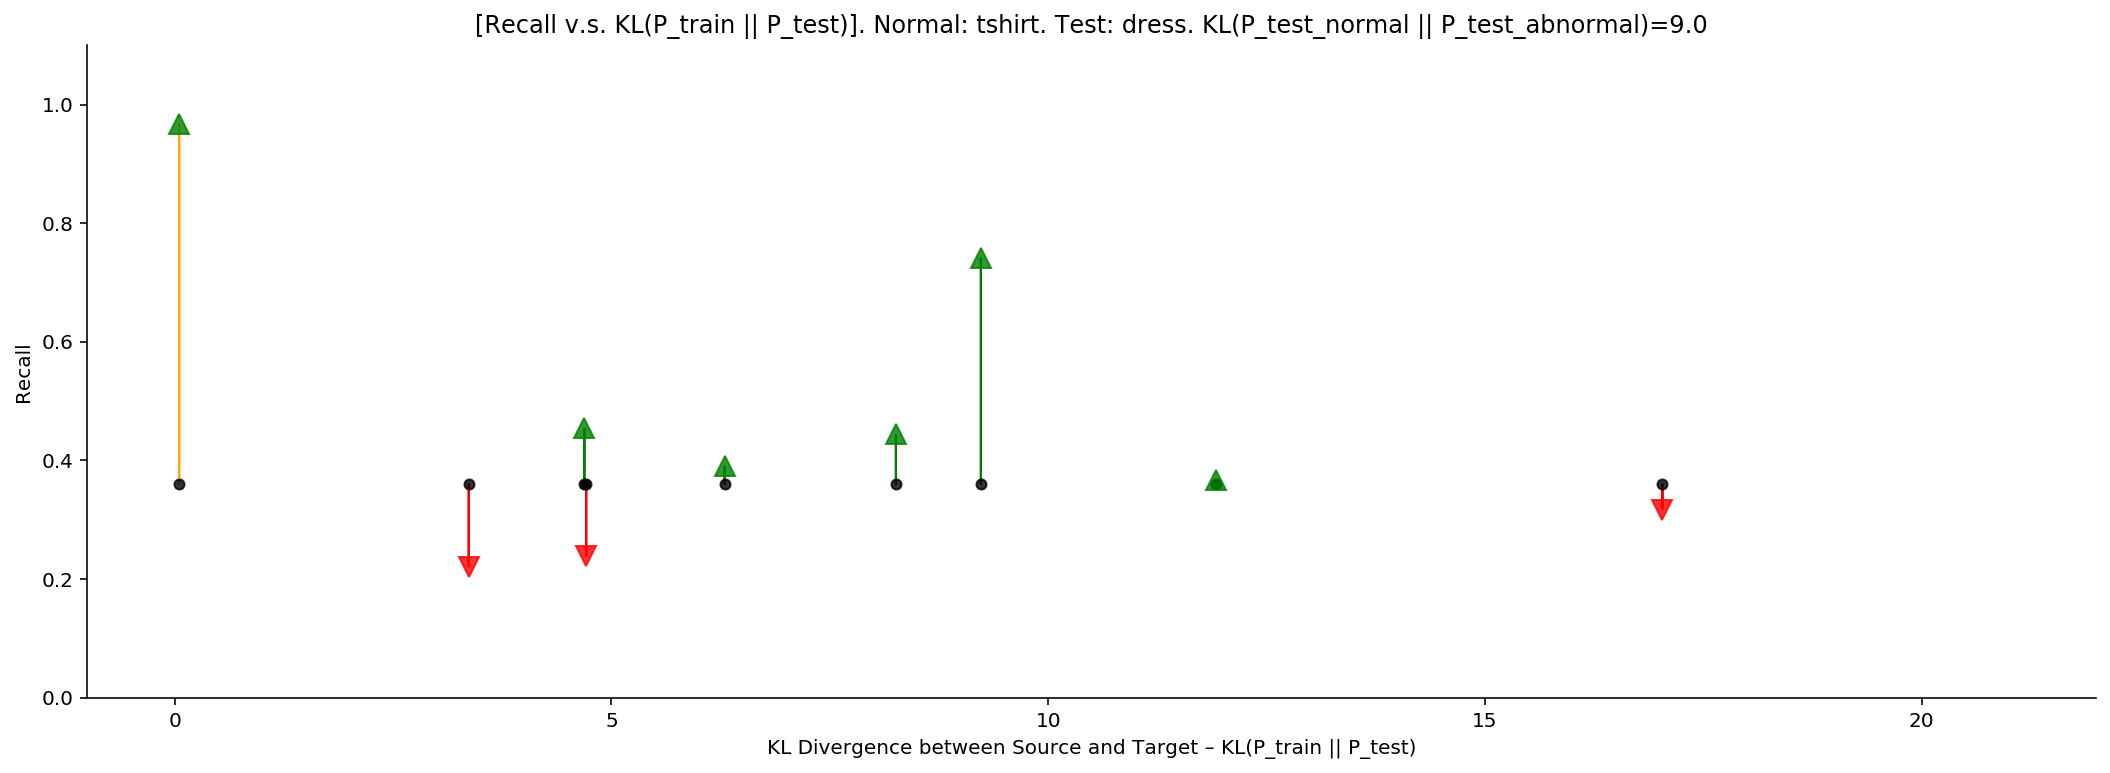

In [81]:
i = 3
y0 = np.array(y_un[i])
y1 = np.array(y_semi[i])
joint_x = np.array(x_joint[i])
margin_x = np.array(x_margin[i])

dy = y1 - y0
pos_ind = np.where(dy >= 0)[0]
nega_ind = np.where(dy < 0)[0]

plt.figure(figsize=(18, 6))
plt.plot(joint_x[pos_ind], y0[pos_ind], '.', color='black', markersize=10, alpha=0.8)
plt.plot(joint_x[nega_ind], y0[nega_ind], '.', color='black', markersize=10, alpha=0.8)
plt.plot(joint_x[pos_ind], y1[pos_ind], '^', color='green', markersize=10, alpha=0.8)
plt.plot(joint_x[nega_ind], y1[nega_ind], 'v', color='red', markersize=10, alpha=0.8)


for j in range(len(y0)):
    # The follow line only works when normal = 0
    if i == j + 1:
        plt.arrow(joint_x[j], y0[j], 0, y1[j] - y0[j],
              width=0.001, length_includes_head=True, head_length=0.01, color='orange')  
    elif y0[j]-y1[j] >= 0:
        plt.arrow(joint_x[j], y0[j], 0, y1[j] - y0[j],
              width=0.001, length_includes_head=True, head_length=0.01, color='red')
    else:
        plt.arrow(joint_x[j], y0[j], 0, y1[j]-y0[j],
              width=0.001, length_includes_head=True, head_length=0.01, color='green')

sns.despine()
plt.ylabel('Recall')
plt.xlabel('KL Divergence between Source and Target – KL(P_train || P_test)')
plt.title('[Recall v.s. KL(P_train || P_test)]. Normal: tshirt. Test: {}. KL(P_test_normal || P_test_abnormal)={}'.format(name_list[i], round(margin_test_for_tshirt[i], 1)))
plt.ylim(0, 1.1)
plt.xlim(-1, 22)
plt.show()

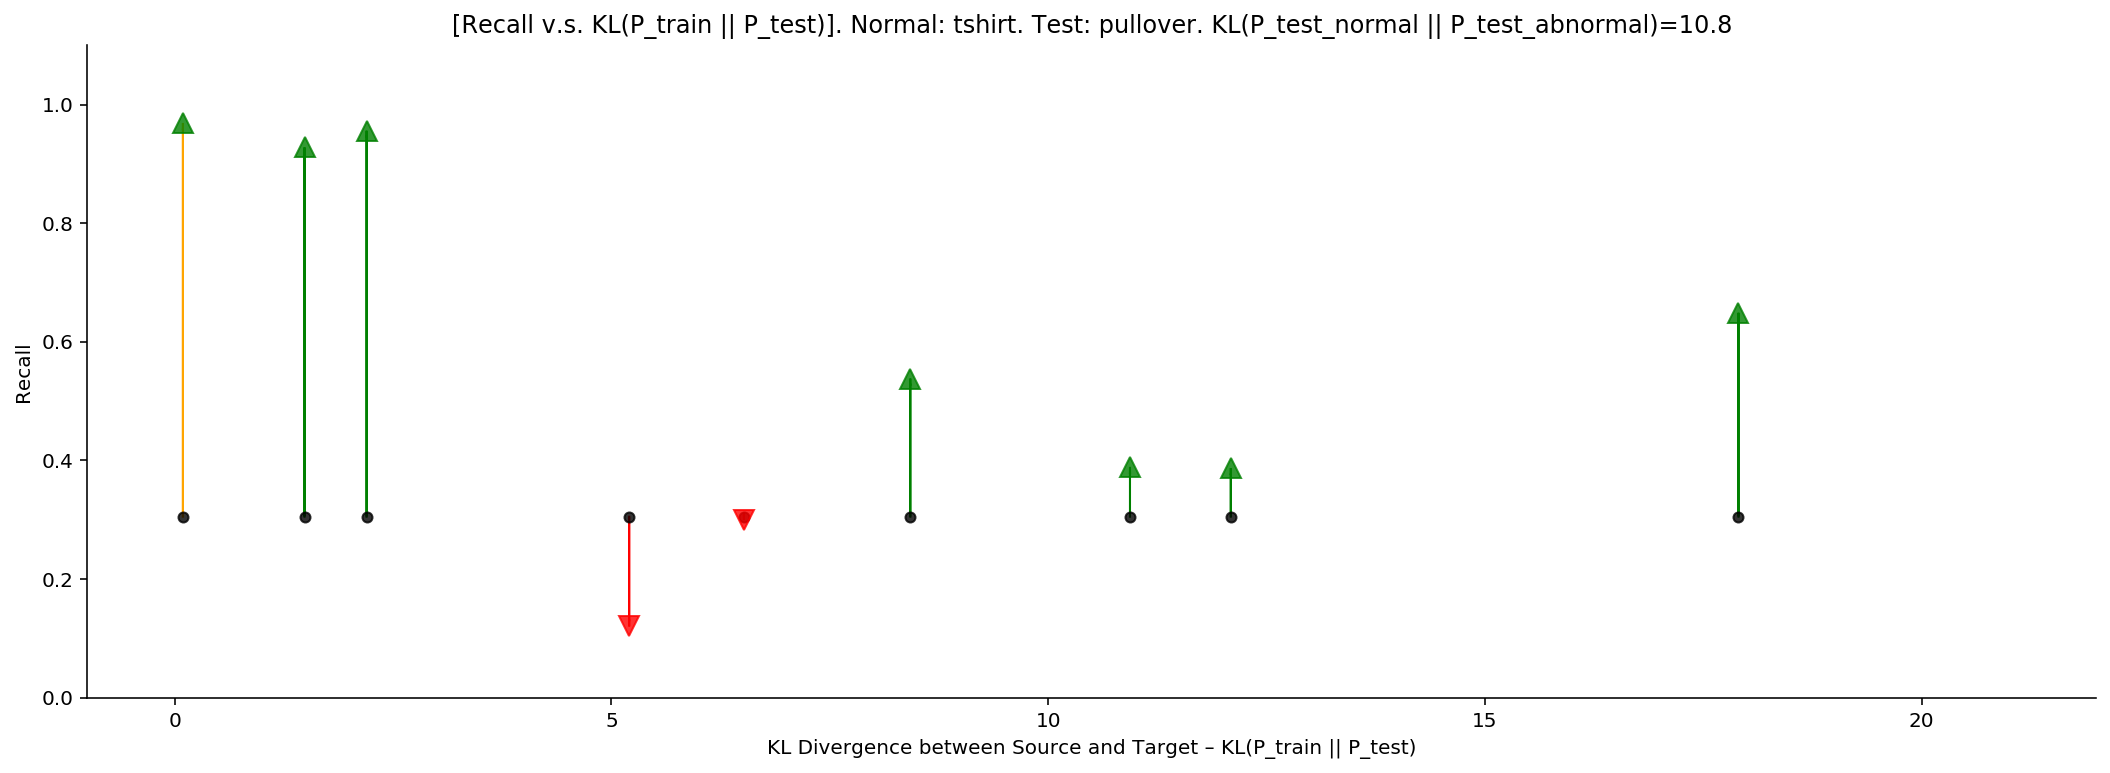

In [80]:
i = 2
y0 = np.array(y_un[i])
y1 = np.array(y_semi[i])
joint_x = np.array(x_joint[i])
margin_x = np.array(x_margin[i])

dy = y1 - y0
pos_ind = np.where(dy >= 0)[0]
nega_ind = np.where(dy < 0)[0]

plt.figure(figsize=(18, 6))
plt.plot(joint_x[pos_ind], y0[pos_ind], '.', color='black', markersize=10, alpha=0.8)
plt.plot(joint_x[nega_ind], y0[nega_ind], '.', color='black', markersize=10, alpha=0.8)
plt.plot(joint_x[pos_ind], y1[pos_ind], '^', color='green', markersize=10, alpha=0.8)
plt.plot(joint_x[nega_ind], y1[nega_ind], 'v', color='red', markersize=10, alpha=0.8)


for j in range(len(y0)):
    # The follow line only works when normal = 0
    if i == j + 1:
        plt.arrow(joint_x[j], y0[j], 0, y1[j] - y0[j],
              width=0.001, length_includes_head=True, head_length=0.01, color='orange')  
    elif y0[j]-y1[j] >= 0:
        plt.arrow(joint_x[j], y0[j], 0, y1[j] - y0[j],
              width=0.001, length_includes_head=True, head_length=0.01, color='red')
    else:
        plt.arrow(joint_x[j], y0[j], 0, y1[j]-y0[j],
              width=0.001, length_includes_head=True, head_length=0.01, color='green')

sns.despine()
plt.ylabel('Recall')
plt.xlabel('KL Divergence between Source and Target – KL(P_train || P_test)')
plt.title('[Recall v.s. KL(P_train || P_test)]. Normal: tshirt. Test: {}. KL(P_test_normal || P_test_abnormal)={}'.format(name_list[i], round(margin_test_for_tshirt[i], 1)))
plt.ylim(0, 1.1)
plt.xlim(-1, 22)
plt.show()

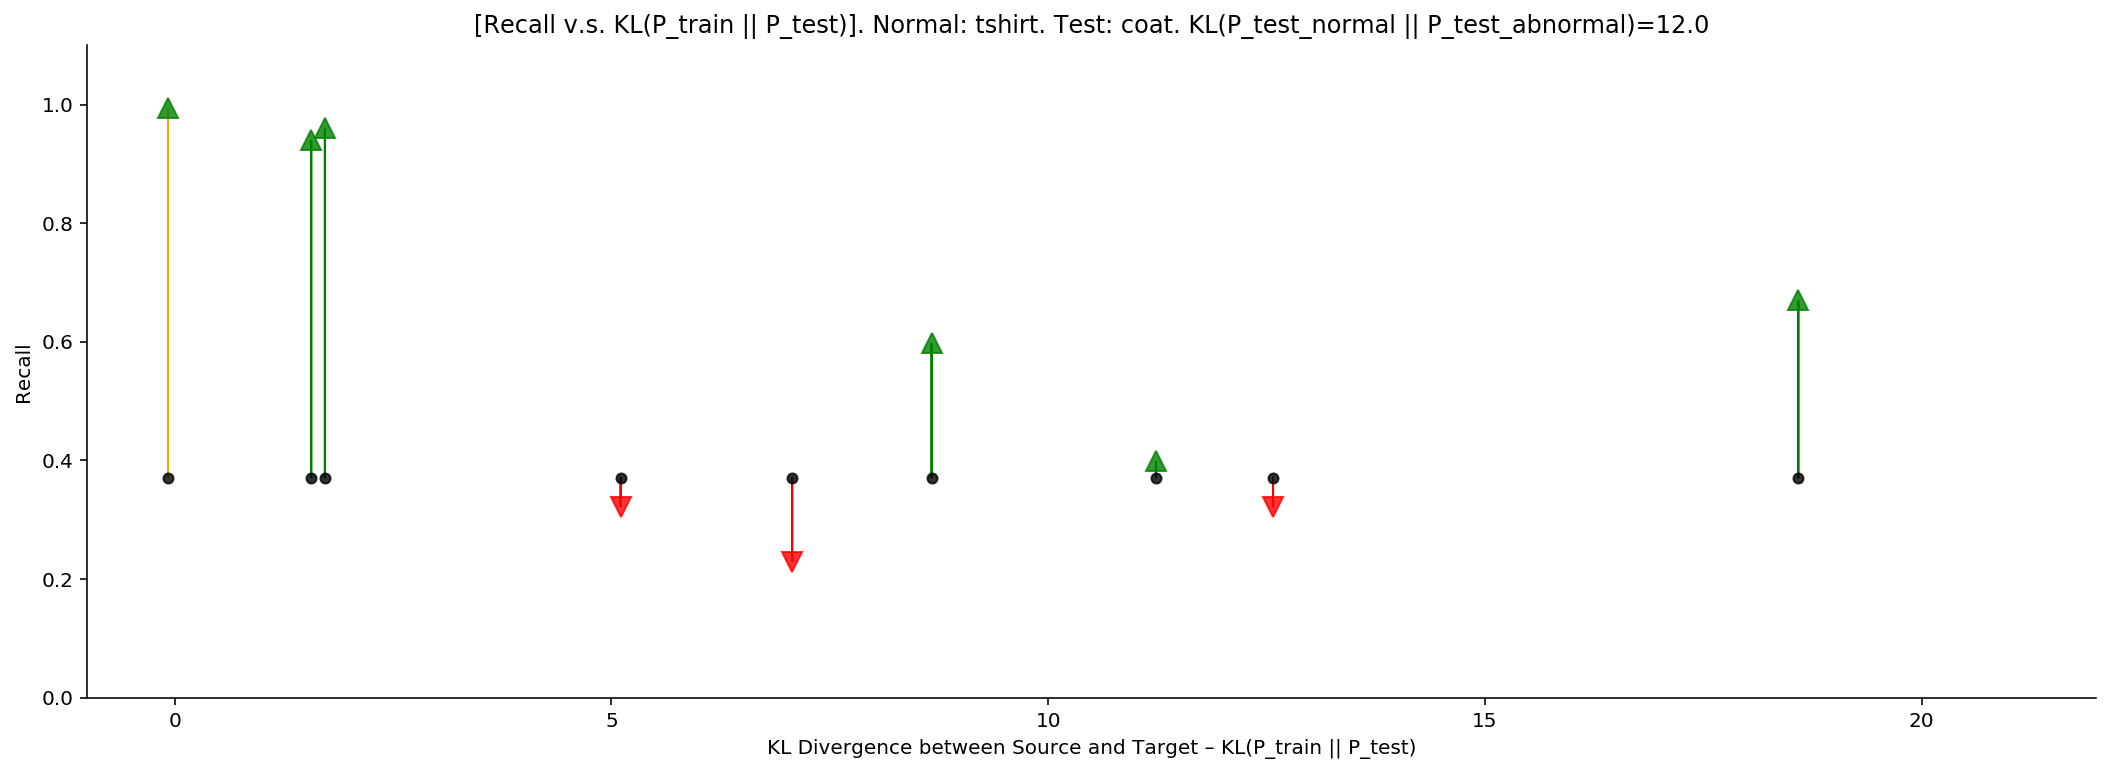

In [79]:
i = 4
y0 = np.array(y_un[i])
y1 = np.array(y_semi[i])
joint_x = np.array(x_joint[i])
margin_x = np.array(x_margin[i])

dy = y1 - y0
pos_ind = np.where(dy >= 0)[0]
nega_ind = np.where(dy < 0)[0]

plt.figure(figsize=(18, 6))
plt.plot(joint_x[pos_ind], y0[pos_ind], '.', color='black', markersize=10, alpha=0.8)
plt.plot(joint_x[nega_ind], y0[nega_ind], '.', color='black', markersize=10, alpha=0.8)
plt.plot(joint_x[pos_ind], y1[pos_ind], '^', color='green', markersize=10, alpha=0.8)
plt.plot(joint_x[nega_ind], y1[nega_ind], 'v', color='red', markersize=10, alpha=0.8)


for j in range(len(y0)):
    # The follow line only works when normal = 0
    if i == j + 1:
        plt.arrow(joint_x[j], y0[j], 0, y1[j] - y0[j],
              width=0.001, length_includes_head=True, head_length=0.01, color='orange')  
    elif y0[j]-y1[j] >= 0:
        plt.arrow(joint_x[j], y0[j], 0, y1[j] - y0[j],
              width=0.001, length_includes_head=True, head_length=0.01, color='red')
    else:
        plt.arrow(joint_x[j], y0[j], 0, y1[j]-y0[j],
              width=0.001, length_includes_head=True, head_length=0.01, color='green')

sns.despine()
plt.ylabel('Recall')
plt.xlabel('KL Divergence between Source and Target – KL(P_train || P_test)')
plt.title('[Recall v.s. KL(P_train || P_test)]. Normal: tshirt. Test: {}. KL(P_test_normal || P_test_abnormal)={}'.format(name_list[i], round(margin_test_for_tshirt[i], 1)))
plt.ylim(0, 1.1)
plt.xlim(-1, 22)
plt.show()

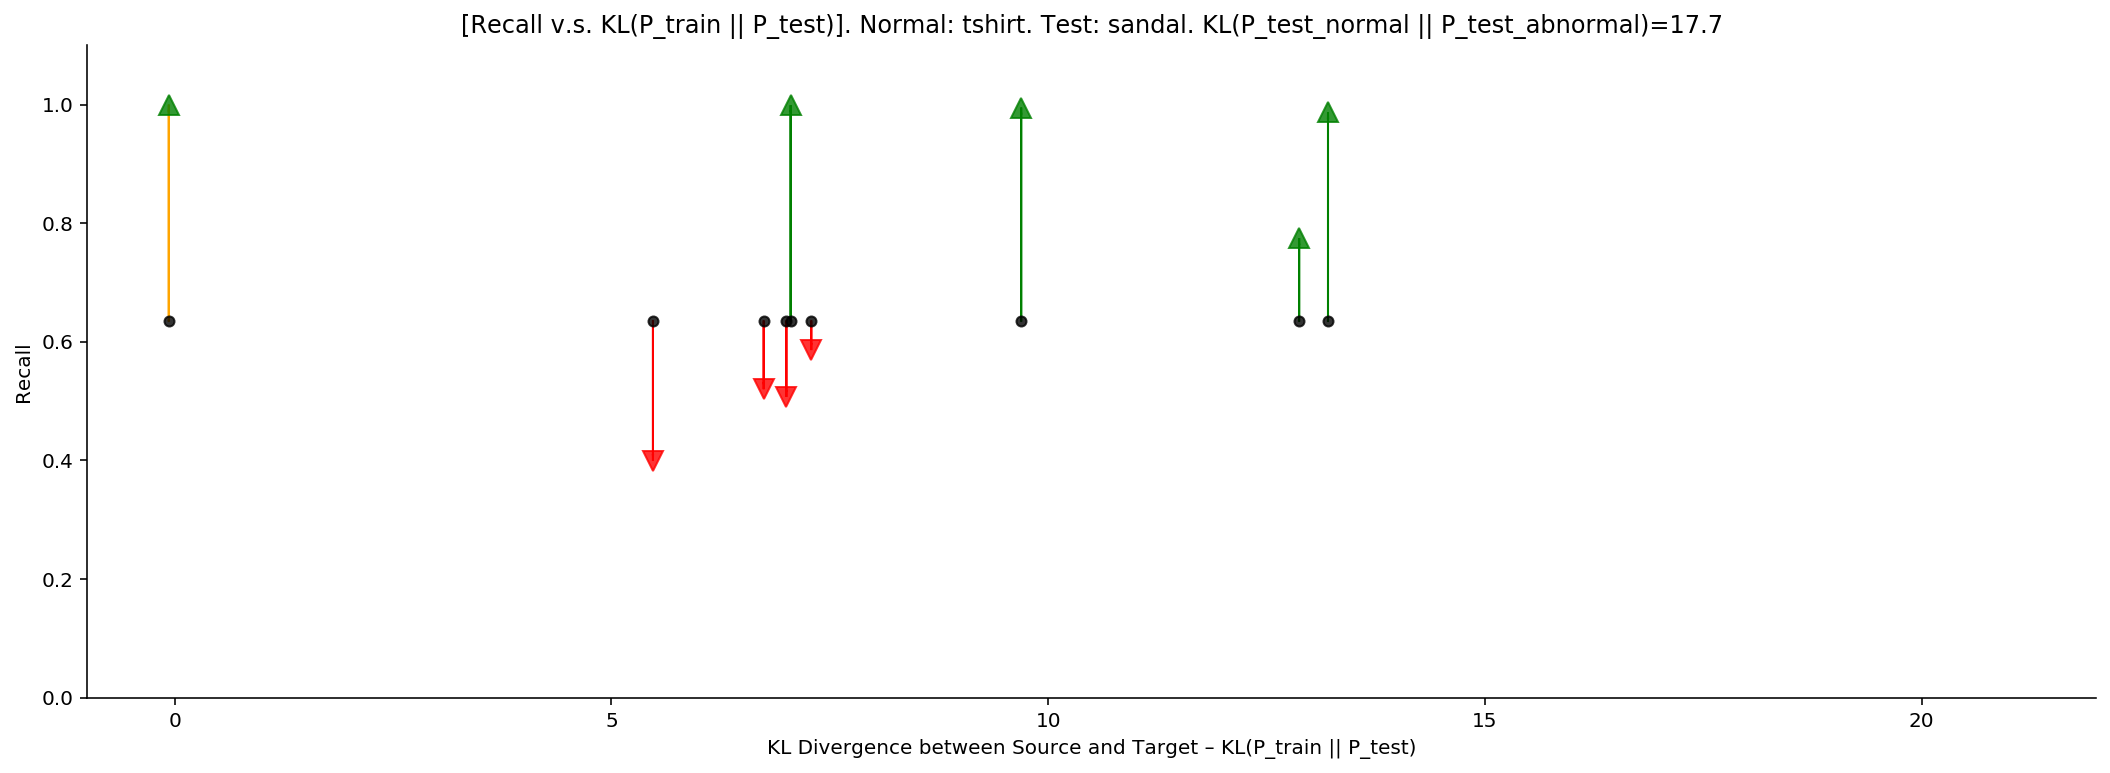

In [83]:
i = 5
y0 = np.array(y_un[i])
y1 = np.array(y_semi[i])
joint_x = np.array(x_joint[i])
margin_x = np.array(x_margin[i])

dy = y1 - y0
pos_ind = np.where(dy >= 0)[0]
nega_ind = np.where(dy < 0)[0]

plt.figure(figsize=(18, 6))
plt.plot(joint_x[pos_ind], y0[pos_ind], '.', color='black', markersize=10, alpha=0.8)
plt.plot(joint_x[nega_ind], y0[nega_ind], '.', color='black', markersize=10, alpha=0.8)
plt.plot(joint_x[pos_ind], y1[pos_ind], '^', color='green', markersize=10, alpha=0.8)
plt.plot(joint_x[nega_ind], y1[nega_ind], 'v', color='red', markersize=10, alpha=0.8)


for j in range(len(y0)):
    # The follow line only works when normal = 0
    if i == j + 1:
        plt.arrow(joint_x[j], y0[j], 0, y1[j] - y0[j],
              width=0.001, length_includes_head=True, head_length=0.01, color='orange')  
    elif y0[j]-y1[j] >= 0:
        plt.arrow(joint_x[j], y0[j], 0, y1[j] - y0[j],
              width=0.001, length_includes_head=True, head_length=0.01, color='red')
    else:
        plt.arrow(joint_x[j], y0[j], 0, y1[j]-y0[j],
              width=0.001, length_includes_head=True, head_length=0.01, color='green')

sns.despine()
plt.ylabel('Recall')
plt.xlabel('KL Divergence between Source and Target – KL(P_train || P_test)')
plt.title('[Recall v.s. KL(P_train || P_test)]. Normal: tshirt. Test: {}. KL(P_test_normal || P_test_abnormal)={}'.format(name_list[i], round(margin_test_for_tshirt[i], 1)))
plt.ylim(0, 1.1)
plt.xlim(-1, 22)
plt.show()

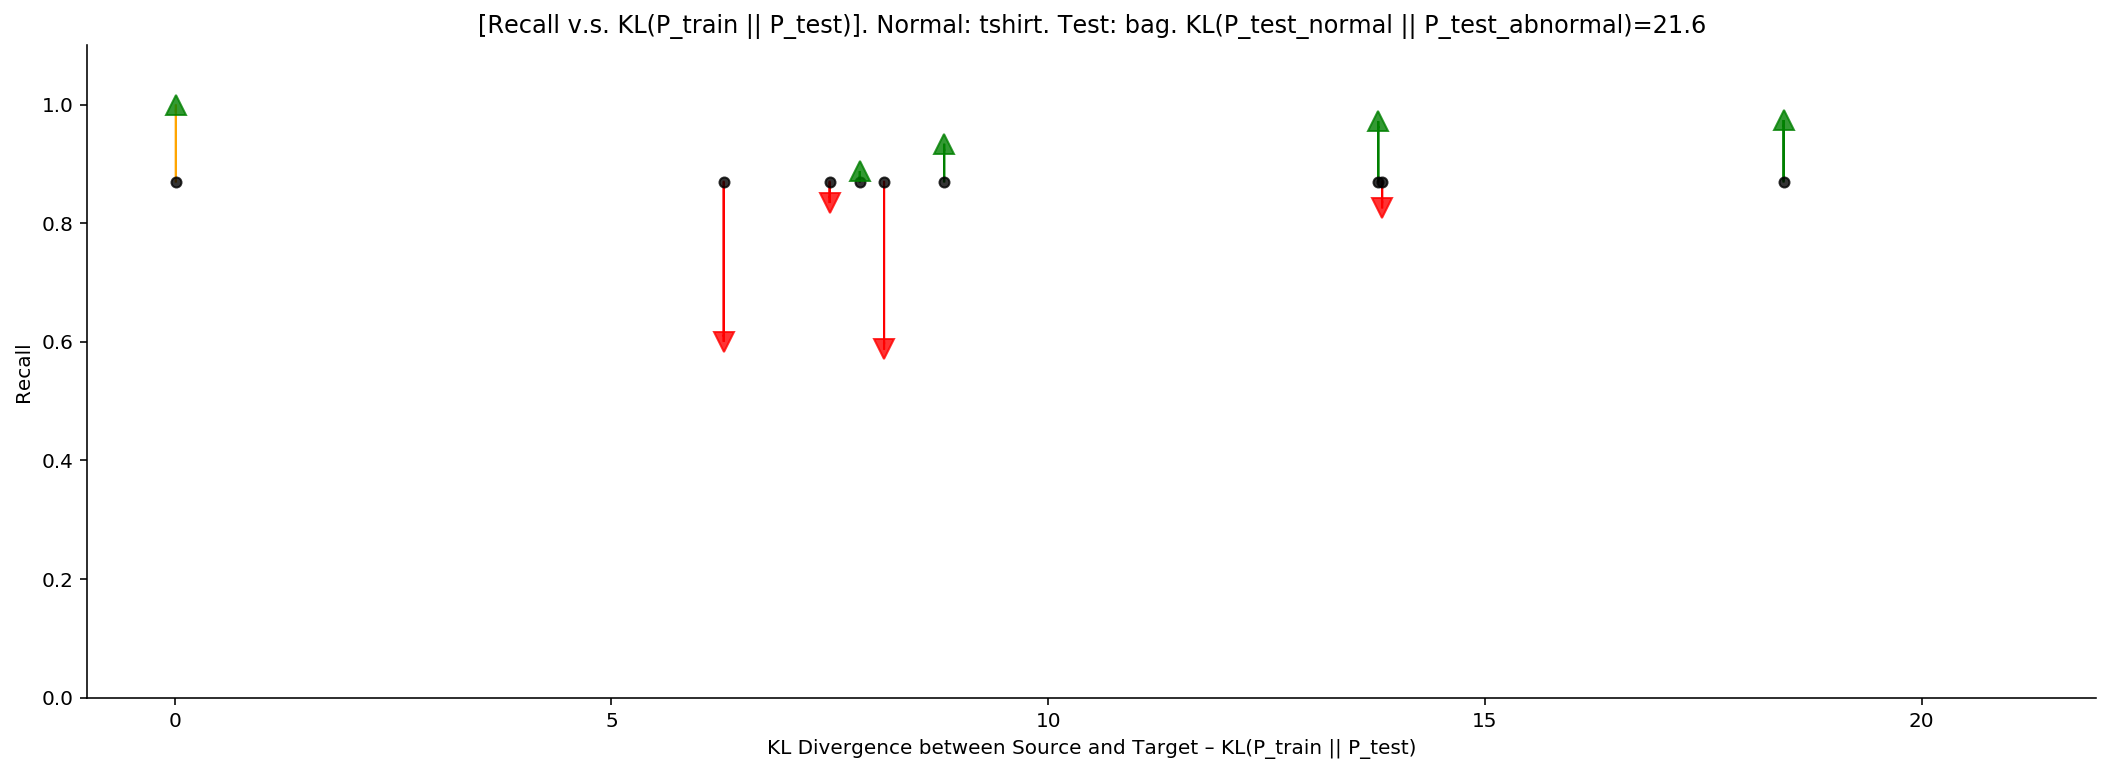

In [78]:
i = 8
y0 = np.array(y_un[i])
y1 = np.array(y_semi[i])
joint_x = np.array(x_joint[i])
margin_x = np.array(x_margin[i])

dy = y1 - y0
pos_ind = np.where(dy >= 0)[0]
nega_ind = np.where(dy < 0)[0]

plt.figure(figsize=(18, 6))
plt.plot(joint_x[pos_ind], y0[pos_ind], '.', color='black', markersize=10, alpha=0.8)
plt.plot(joint_x[nega_ind], y0[nega_ind], '.', color='black', markersize=10, alpha=0.8)
plt.plot(joint_x[pos_ind], y1[pos_ind], '^', color='green', markersize=10, alpha=0.8)
plt.plot(joint_x[nega_ind], y1[nega_ind], 'v', color='red', markersize=10, alpha=0.8)


for j in range(len(y0)):
    # The follow line only works when normal = 0
    if i == j + 1:
        plt.arrow(joint_x[j], y0[j], 0, y1[j] - y0[j],
              width=0.001, length_includes_head=True, head_length=0.01, color='orange')  
    elif y0[j]-y1[j] >= 0:
        plt.arrow(joint_x[j], y0[j], 0, y1[j] - y0[j],
              width=0.001, length_includes_head=True, head_length=0.01, color='red')
    else:
        plt.arrow(joint_x[j], y0[j], 0, y1[j]-y0[j],
              width=0.001, length_includes_head=True, head_length=0.01, color='green')

sns.despine()
plt.ylabel('Recall')
plt.xlabel('KL Divergence between Source and Target – KL(P_train || P_test)')
plt.title('[Recall v.s. KL(P_train || P_test)]. Normal: tshirt. Test: {}. KL(P_test_normal || P_test_abnormal)={}'.format(name_list[i], round(margin_test_for_tshirt[i], 1)))
plt.ylim(0, 1.1)
plt.xlim(-1, 22)
plt.show()

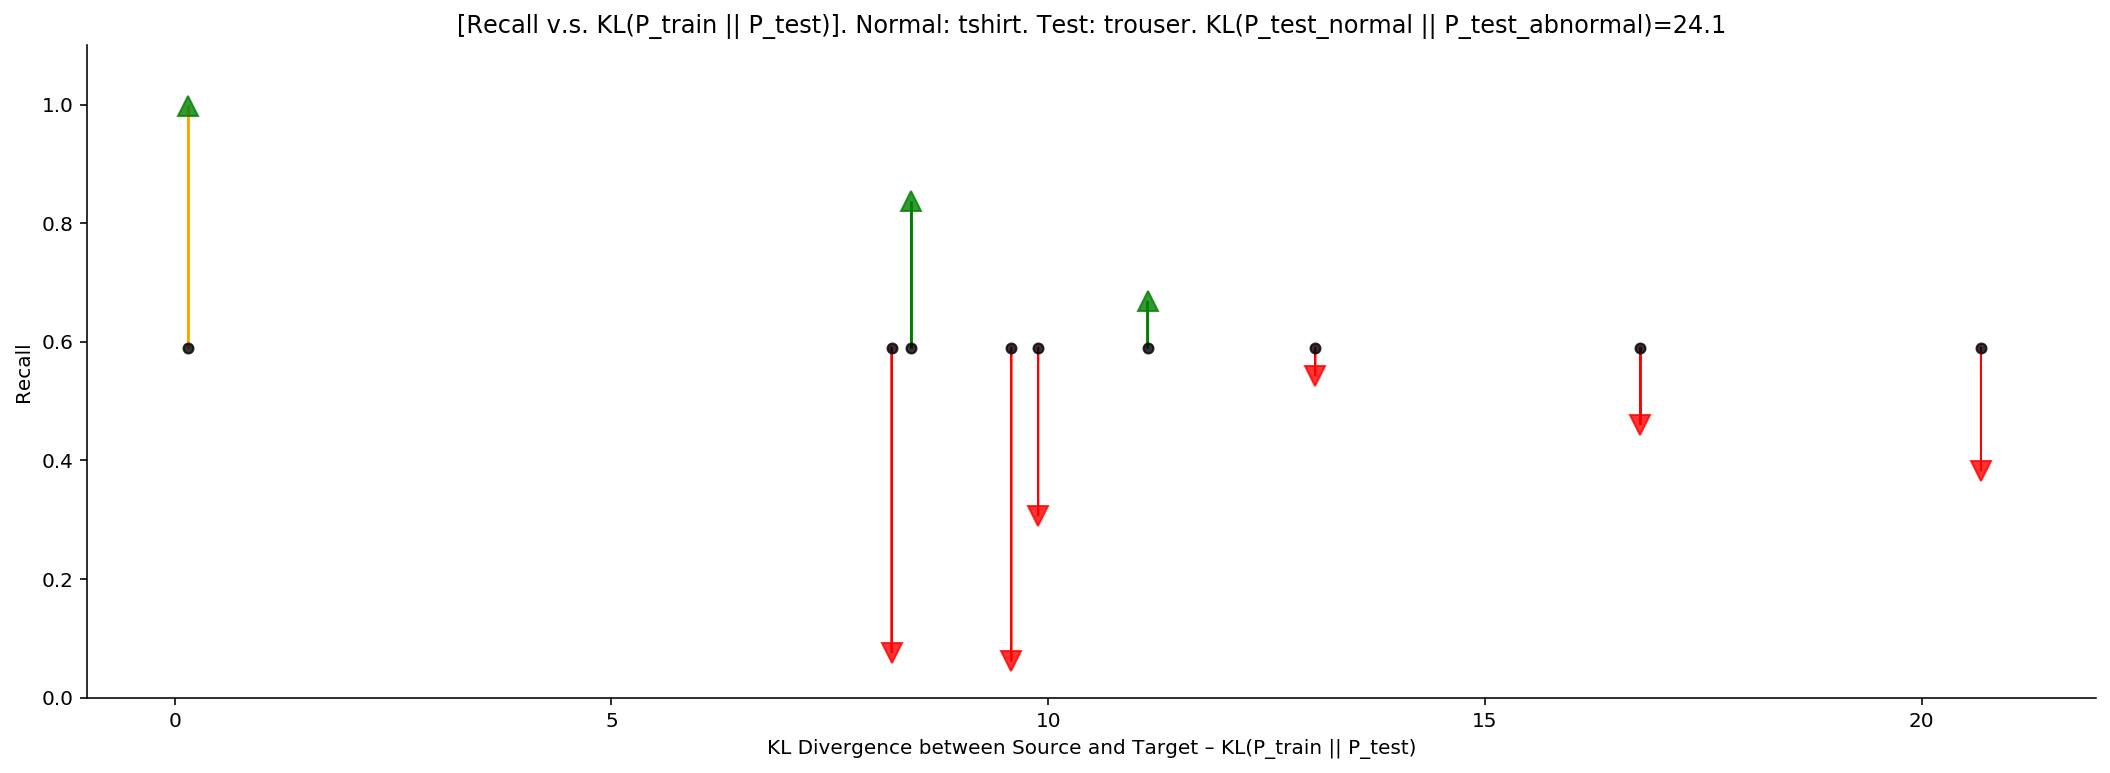

In [77]:
i = 1
y0 = np.array(y_un[i])
y1 = np.array(y_semi[i])
joint_x = np.array(x_joint[i])
margin_x = np.array(x_margin[i])

dy = y1 - y0
pos_ind = np.where(dy >= 0)[0]
nega_ind = np.where(dy < 0)[0]

plt.figure(figsize=(18, 6))
plt.plot(joint_x[pos_ind], y0[pos_ind], '.', color='black', markersize=10, alpha=0.8)
plt.plot(joint_x[nega_ind], y0[nega_ind], '.', color='black', markersize=10, alpha=0.8)
plt.plot(joint_x[pos_ind], y1[pos_ind], '^', color='green', markersize=10, alpha=0.8)
plt.plot(joint_x[nega_ind], y1[nega_ind], 'v', color='red', markersize=10, alpha=0.8)


for j in range(len(y0)):
    # The follow line only works when normal = 0
    if i == j + 1:
        plt.arrow(joint_x[j], y0[j], 0, y1[j] - y0[j],
              width=0.001, length_includes_head=True, head_length=0.01, color='orange')  
    elif y0[j]-y1[j] >= 0:
        plt.arrow(joint_x[j], y0[j], 0, y1[j] - y0[j],
              width=0.001, length_includes_head=True, head_length=0.01, color='red')
    else:
        plt.arrow(joint_x[j], y0[j], 0, y1[j]-y0[j],
              width=0.001, length_includes_head=True, head_length=0.01, color='green')

sns.despine()
plt.ylabel('Recall')
plt.xlabel('KL Divergence between Source and Target – KL(P_train || P_test)')
plt.title('[Recall v.s. KL(P_train || P_test)]. Normal: tshirt. Test: {}. KL(P_test_normal || P_test_abnormal)={}'.format(name_list[i], round(margin_test_for_tshirt[i], 1)))
plt.ylim(0, 1.1)
plt.xlim(-1, 22)
plt.show()

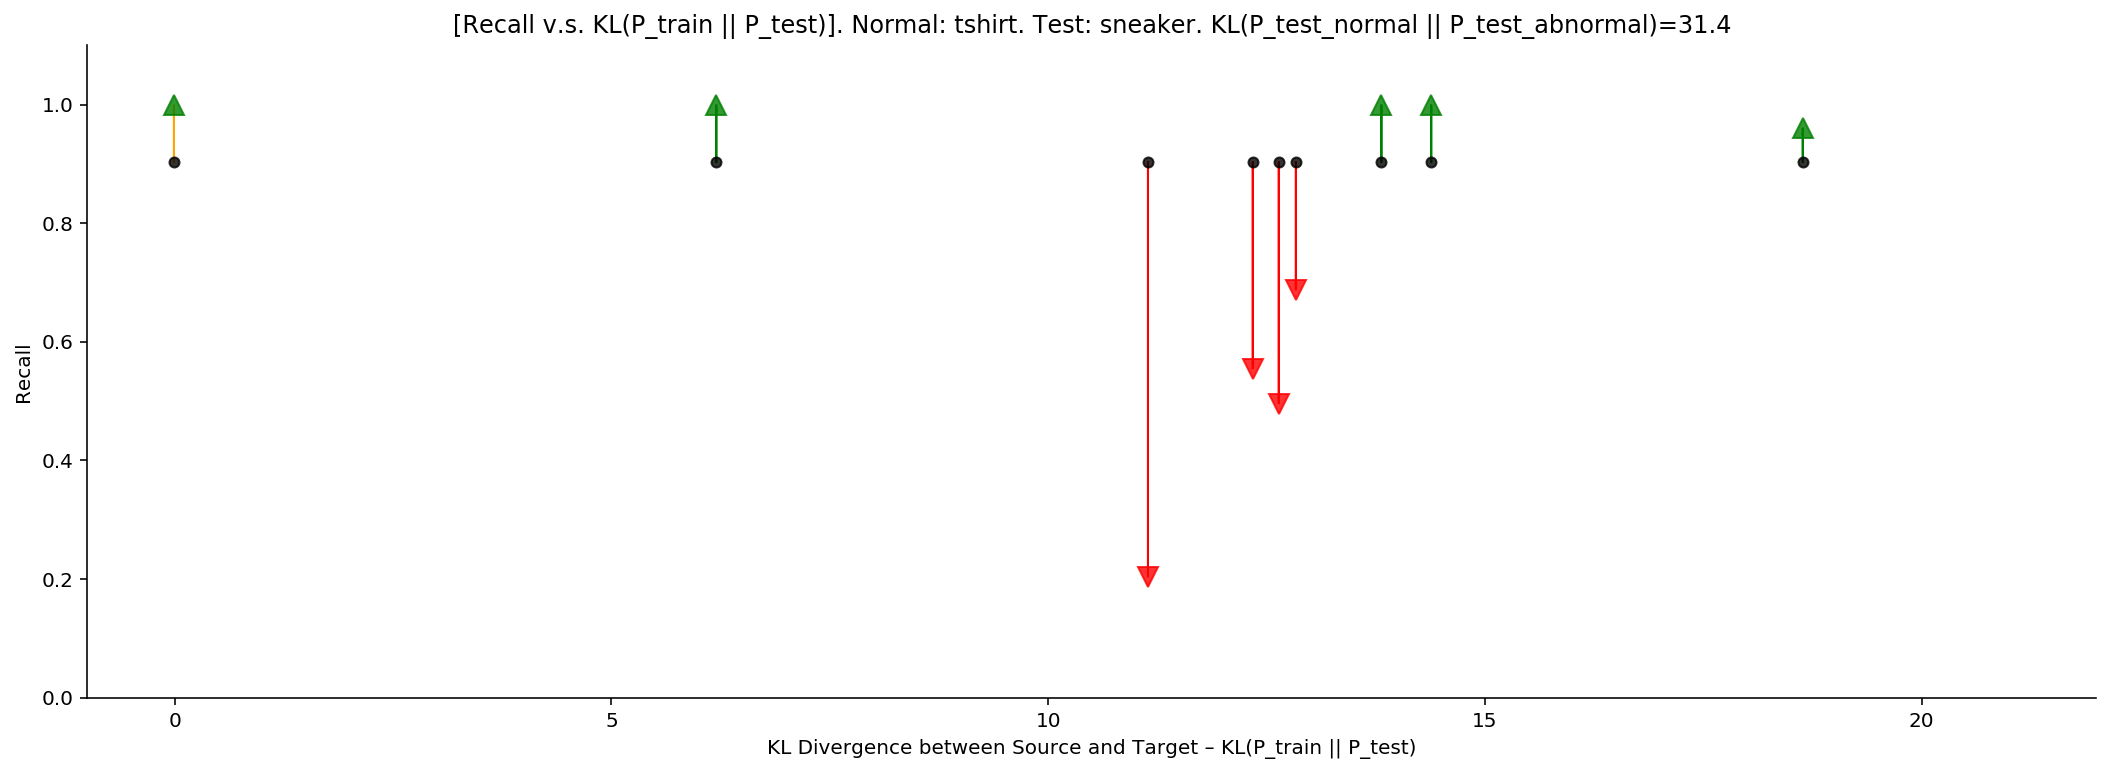

In [84]:
i = 7
y0 = np.array(y_un[i])
y1 = np.array(y_semi[i])
joint_x = np.array(x_joint[i])
margin_x = np.array(x_margin[i])

dy = y1 - y0
pos_ind = np.where(dy >= 0)[0]
nega_ind = np.where(dy < 0)[0]

plt.figure(figsize=(18, 6))
plt.plot(joint_x[pos_ind], y0[pos_ind], '.', color='black', markersize=10, alpha=0.8)
plt.plot(joint_x[nega_ind], y0[nega_ind], '.', color='black', markersize=10, alpha=0.8)
plt.plot(joint_x[pos_ind], y1[pos_ind], '^', color='green', markersize=10, alpha=0.8)
plt.plot(joint_x[nega_ind], y1[nega_ind], 'v', color='red', markersize=10, alpha=0.8)


for j in range(len(y0)):
    # The follow line only works when normal = 0
    if i == j + 1:
        plt.arrow(joint_x[j], y0[j], 0, y1[j] - y0[j],
              width=0.001, length_includes_head=True, head_length=0.01, color='orange')  
    elif y0[j]-y1[j] >= 0:
        plt.arrow(joint_x[j], y0[j], 0, y1[j] - y0[j],
              width=0.001, length_includes_head=True, head_length=0.01, color='red')
    else:
        plt.arrow(joint_x[j], y0[j], 0, y1[j]-y0[j],
              width=0.001, length_includes_head=True, head_length=0.01, color='green')

sns.despine()
plt.ylabel('Recall')
plt.xlabel('KL Divergence between Source and Target – KL(P_train || P_test)')
plt.title('[Recall v.s. KL(P_train || P_test)]. Normal: tshirt. Test: {}. KL(P_test_normal || P_test_abnormal)={}'.format(name_list[i], round(margin_test_for_tshirt[i], 1)))
plt.ylim(0, 1.1)
plt.xlim(-1, 22)
plt.show()

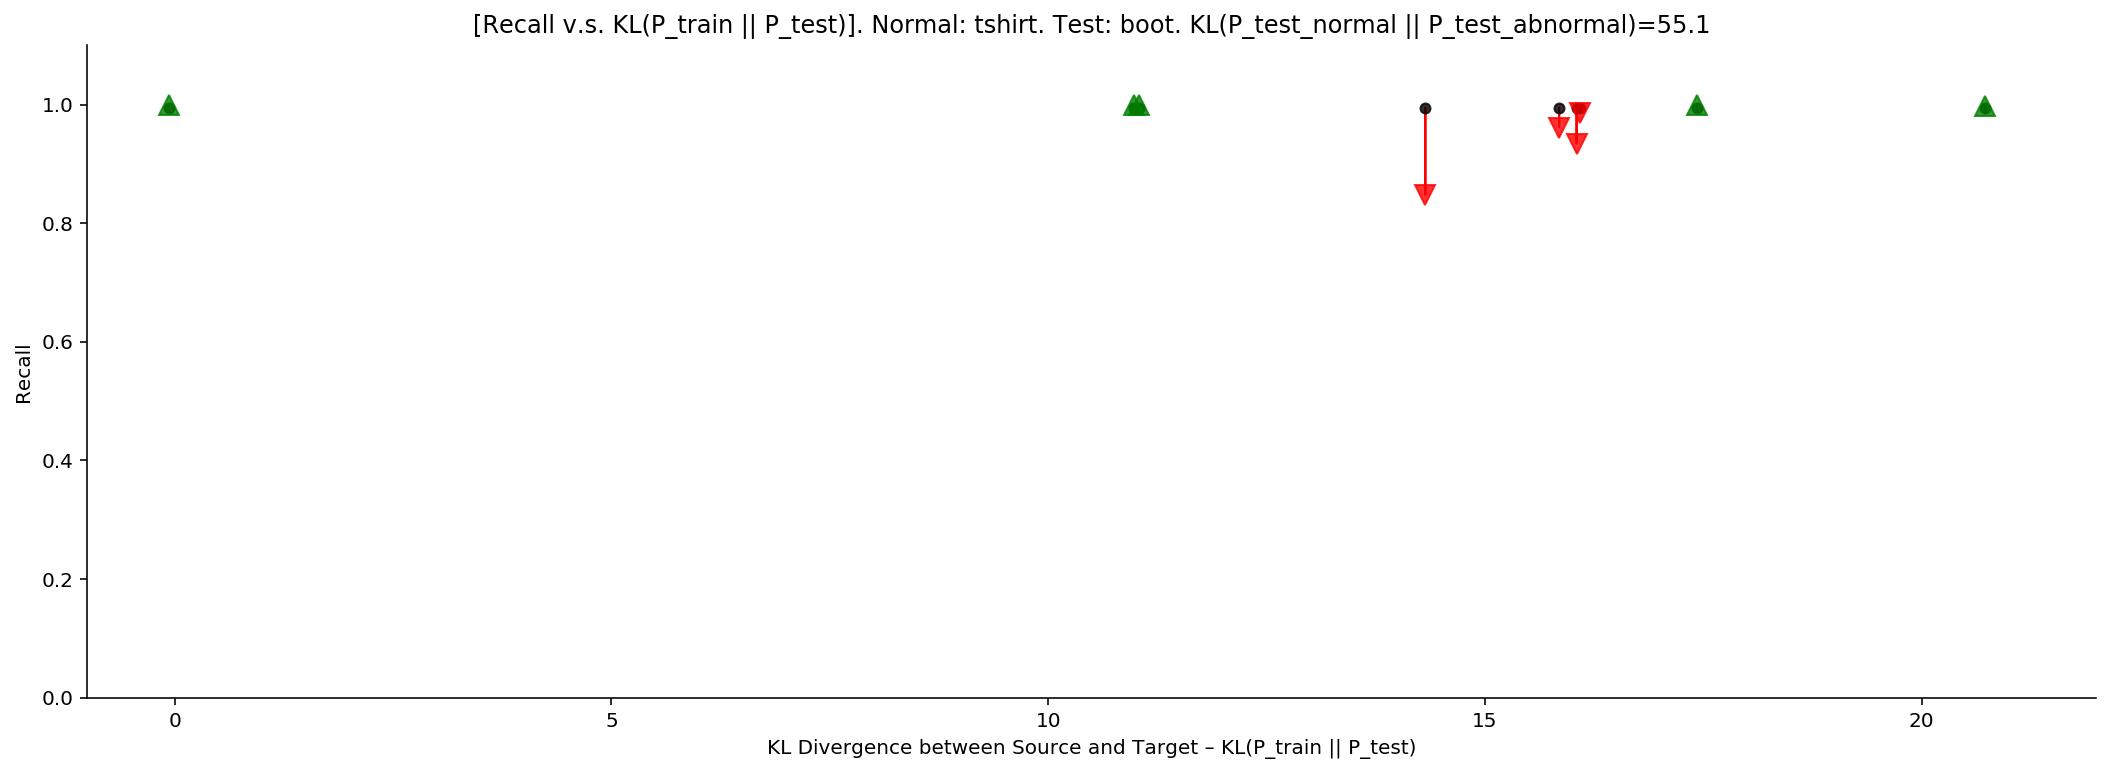

In [72]:
i = 9
y0 = np.array(y_un[i])
y1 = np.array(y_semi[i])
joint_x = np.array(x_joint[i])
margin_x = np.array(x_margin[i])

dy = y1 - y0
pos_ind = np.where(dy >= 0)[0]
nega_ind = np.where(dy < 0)[0]

plt.figure(figsize=(18, 6))
plt.plot(joint_x[pos_ind], y0[pos_ind], '.', color='black', markersize=10, alpha=0.8)
plt.plot(joint_x[nega_ind], y0[nega_ind], '.', color='black', markersize=10, alpha=0.8)
plt.plot(joint_x[pos_ind], y1[pos_ind], '^', color='green', markersize=10, alpha=0.8)
plt.plot(joint_x[nega_ind], y1[nega_ind], 'v', color='red', markersize=10, alpha=0.8)


for j in range(len(y0)):
    # The follow line only works when normal = 0
    if i == j + 1:
        plt.arrow(joint_x[j], y0[j], 0, y1[j] - y0[j],
              width=0.001, length_includes_head=True, head_length=0.01, color='orange')  
    elif y0[j]-y1[j] >= 0:
        plt.arrow(joint_x[j], y0[j], 0, y1[j] - y0[j],
              width=0.001, length_includes_head=True, head_length=0.01, color='red')
    else:
        plt.arrow(joint_x[j], y0[j], 0, y1[j]-y0[j],
              width=0.001, length_includes_head=True, head_length=0.01, color='green')

sns.despine()
plt.ylabel('Recall')
plt.xlabel('KL Divergence between Source and Target – KL(P_train || P_test)')
plt.title('[Recall v.s. KL(P_train || P_test)]. Normal: tshirt. Test: {}. KL(P_test_normal || P_test_abnormal)={}'.format(name_list[i], round(margin_test_for_tshirt[i], 1)))
plt.ylim(0, 1.1)
plt.xlim(-1, 22)
plt.show()

# Draw Plots for Marginal Divergence

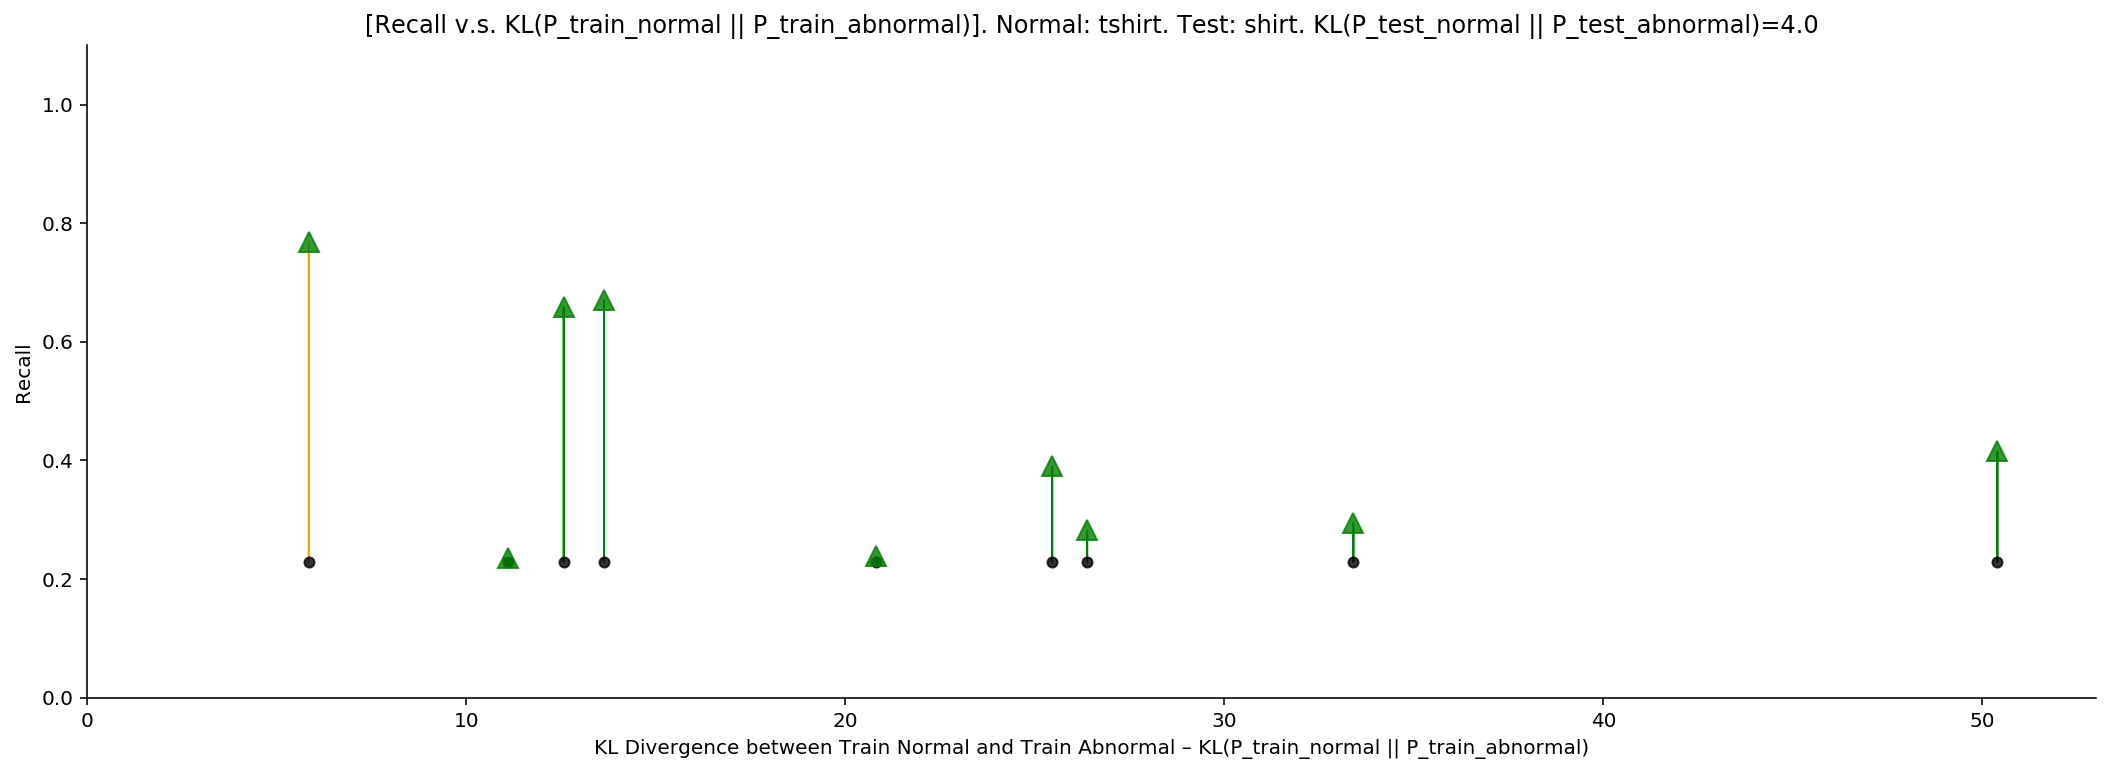

In [53]:
i = 6
y0 = np.array(y_un[i])
y1 = np.array(y_semi[i])
margin_x = np.array(x_margin[i])

dy = y1 - y0
pos_ind = np.where(dy >= 0)[0]
nega_ind = np.where(dy < 0)[0]

plt.figure(figsize=(18, 6))
plt.plot(margin_x[pos_ind], y0[pos_ind], '.', color='black', markersize=10, alpha=0.8)
plt.plot(margin_x[nega_ind], y0[nega_ind], '.', color='black', markersize=10, alpha=0.8)
plt.plot(margin_x[pos_ind], y1[pos_ind], '^', color='green', markersize=10, alpha=0.8)
plt.plot(margin_x[nega_ind], y1[nega_ind], 'v', color='red', markersize=10, alpha=0.8)


for j in range(len(y0)):
    # The follow line only works when normal = 0
    if i == j + 1:
        plt.arrow(margin_x[j], y0[j], 0, y1[j] - y0[j],
              width=0.001, length_includes_head=True, head_length=0.01, color='orange')  
    elif y0[j]-y1[j] >= 0:
        plt.arrow(margin_x[j], y0[j], 0, y1[j] - y0[j],
              width=0.001, length_includes_head=True, head_length=0.01, color='red')
    else:
        plt.arrow(margin_x[j], y0[j], 0, y1[j]-y0[j],
              width=0.001, length_includes_head=True, head_length=0.01, color='green')

sns.despine()
plt.ylabel('Recall')
plt.xlabel('KL Divergence between Train Normal and Train Abnormal – KL(P_train_normal || P_train_abnormal)')
plt.title('[Recall v.s. KL(P_train_normal || P_train_abnormal)]. Normal: tshirt. Test: {}. KL(P_test_normal || P_test_abnormal)={}'.format(name_list[i], round(margin_test_for_tshirt[i], 1)))
plt.ylim(0, 1.1)
plt.xlim(0, 53)
plt.show()

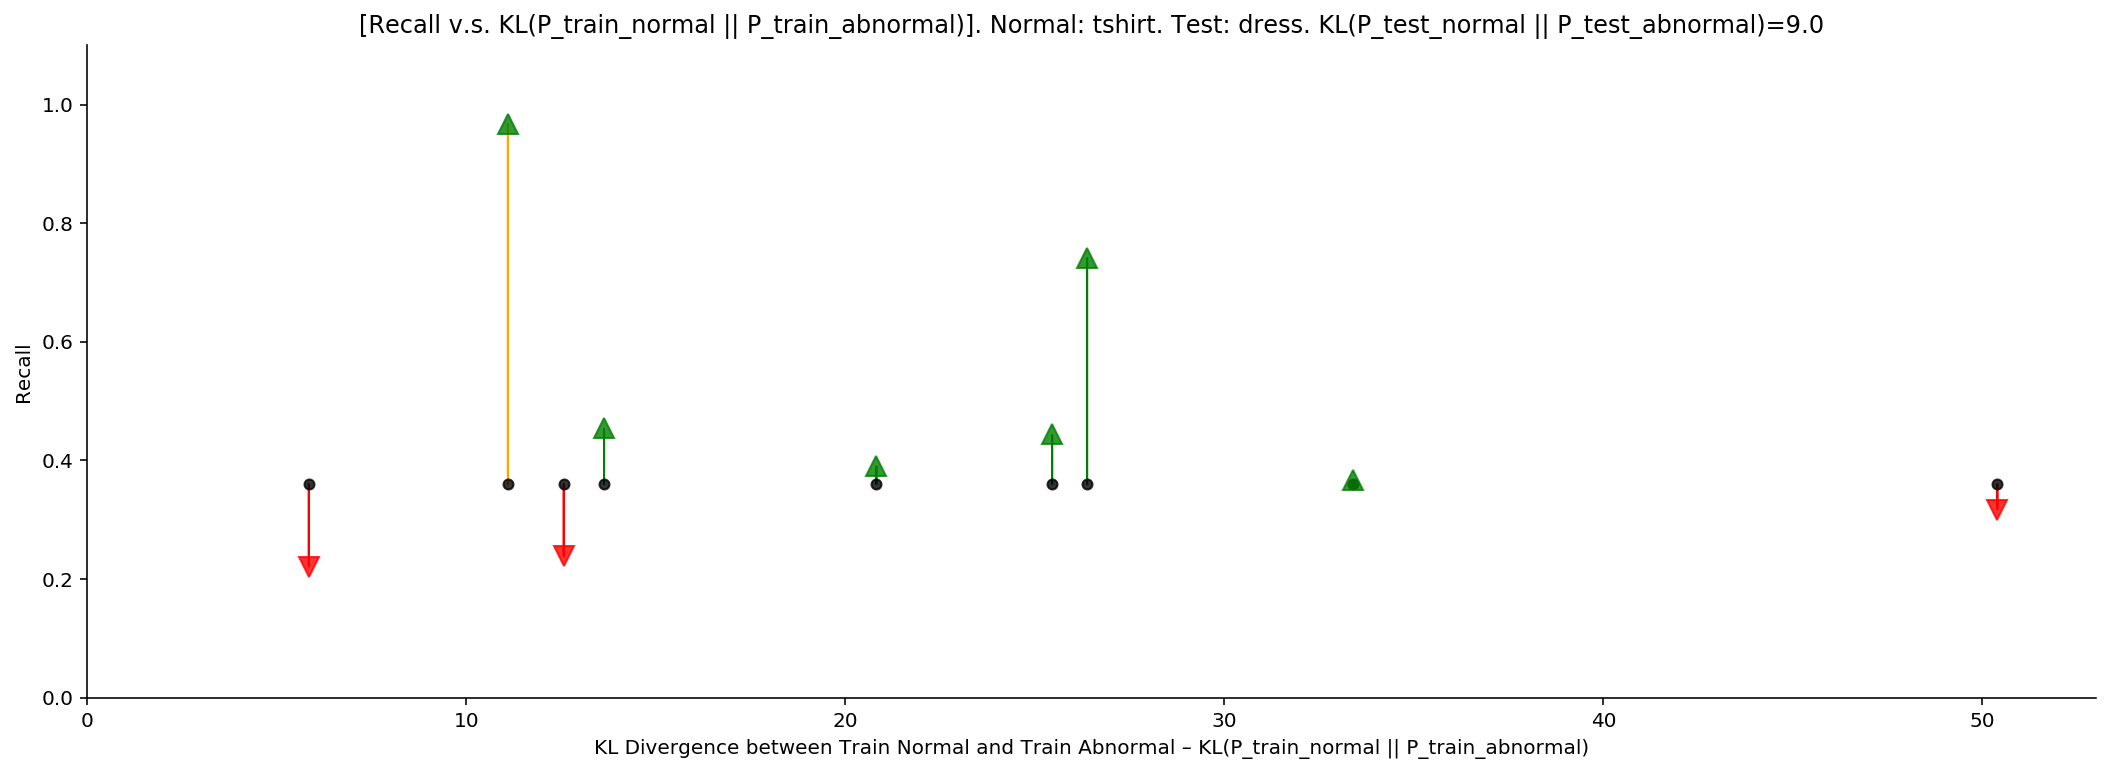

In [54]:
i = 3
y0 = np.array(y_un[i])
y1 = np.array(y_semi[i])
margin_x = np.array(x_margin[i])

dy = y1 - y0
pos_ind = np.where(dy >= 0)[0]
nega_ind = np.where(dy < 0)[0]

plt.figure(figsize=(18, 6))
plt.plot(margin_x[pos_ind], y0[pos_ind], '.', color='black', markersize=10, alpha=0.8)
plt.plot(margin_x[nega_ind], y0[nega_ind], '.', color='black', markersize=10, alpha=0.8)
plt.plot(margin_x[pos_ind], y1[pos_ind], '^', color='green', markersize=10, alpha=0.8)
plt.plot(margin_x[nega_ind], y1[nega_ind], 'v', color='red', markersize=10, alpha=0.8)


for j in range(len(y0)):
    # The follow line only works when normal = 0
    if i == j + 1:
        plt.arrow(margin_x[j], y0[j], 0, y1[j] - y0[j],
              width=0.001, length_includes_head=True, head_length=0.01, color='orange')  
    elif y0[j]-y1[j] >= 0:
        plt.arrow(margin_x[j], y0[j], 0, y1[j] - y0[j],
              width=0.001, length_includes_head=True, head_length=0.01, color='red')
    else:
        plt.arrow(margin_x[j], y0[j], 0, y1[j]-y0[j],
              width=0.001, length_includes_head=True, head_length=0.01, color='green')

sns.despine()
plt.ylabel('Recall')
plt.xlabel('KL Divergence between Train Normal and Train Abnormal – KL(P_train_normal || P_train_abnormal)')
plt.title('[Recall v.s. KL(P_train_normal || P_train_abnormal)]. Normal: tshirt. Test: {}. KL(P_test_normal || P_test_abnormal)={}'.format(name_list[i], round(margin_test_for_tshirt[i], 1)))
plt.ylim(0, 1.1)
plt.xlim(0, 53)
plt.show()

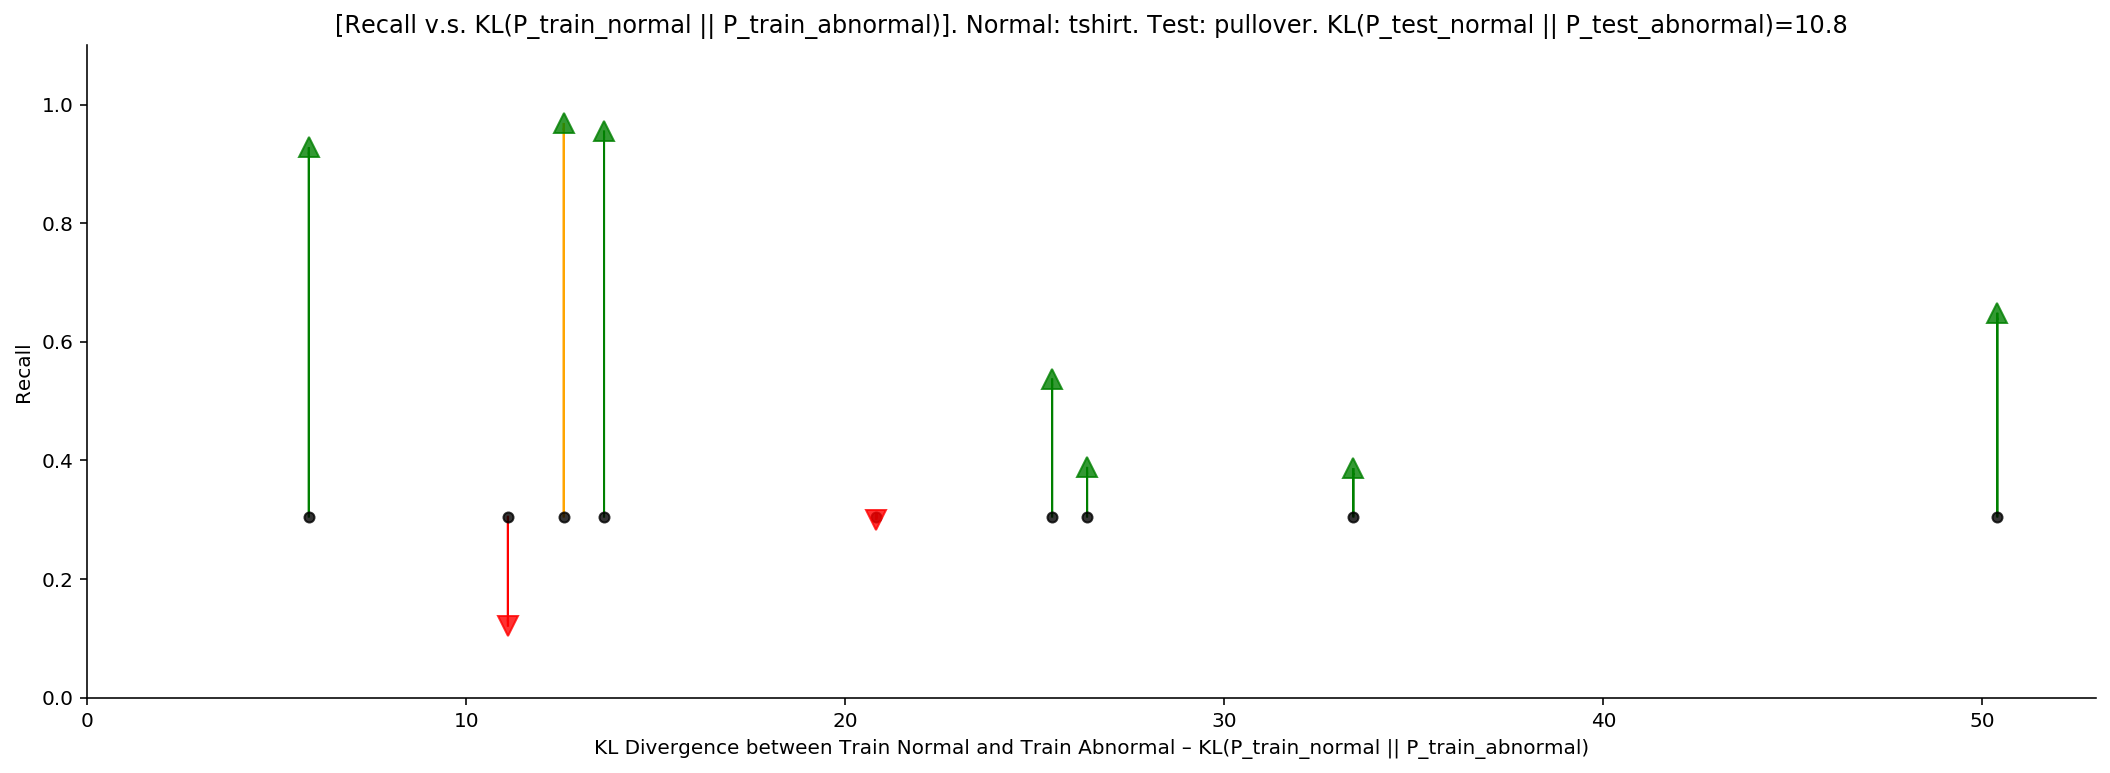

In [55]:
i = 2
y0 = np.array(y_un[i])
y1 = np.array(y_semi[i])
margin_x = np.array(x_margin[i])

dy = y1 - y0
pos_ind = np.where(dy >= 0)[0]
nega_ind = np.where(dy < 0)[0]

plt.figure(figsize=(18, 6))
plt.plot(margin_x[pos_ind], y0[pos_ind], '.', color='black', markersize=10, alpha=0.8)
plt.plot(margin_x[nega_ind], y0[nega_ind], '.', color='black', markersize=10, alpha=0.8)
plt.plot(margin_x[pos_ind], y1[pos_ind], '^', color='green', markersize=10, alpha=0.8)
plt.plot(margin_x[nega_ind], y1[nega_ind], 'v', color='red', markersize=10, alpha=0.8)


for j in range(len(y0)):
    # The follow line only works when normal = 0
    if i == j + 1:
        plt.arrow(margin_x[j], y0[j], 0, y1[j] - y0[j],
              width=0.001, length_includes_head=True, head_length=0.01, color='orange')  
    elif y0[j]-y1[j] >= 0:
        plt.arrow(margin_x[j], y0[j], 0, y1[j] - y0[j],
              width=0.001, length_includes_head=True, head_length=0.01, color='red')
    else:
        plt.arrow(margin_x[j], y0[j], 0, y1[j]-y0[j],
              width=0.001, length_includes_head=True, head_length=0.01, color='green')

sns.despine()
plt.ylabel('Recall')
plt.xlabel('KL Divergence between Train Normal and Train Abnormal – KL(P_train_normal || P_train_abnormal)')
plt.title('[Recall v.s. KL(P_train_normal || P_train_abnormal)]. Normal: tshirt. Test: {}. KL(P_test_normal || P_test_abnormal)={}'.format(name_list[i], round(margin_test_for_tshirt[i], 1)))
plt.ylim(0, 1.1)
plt.xlim(0, 53)
plt.show()

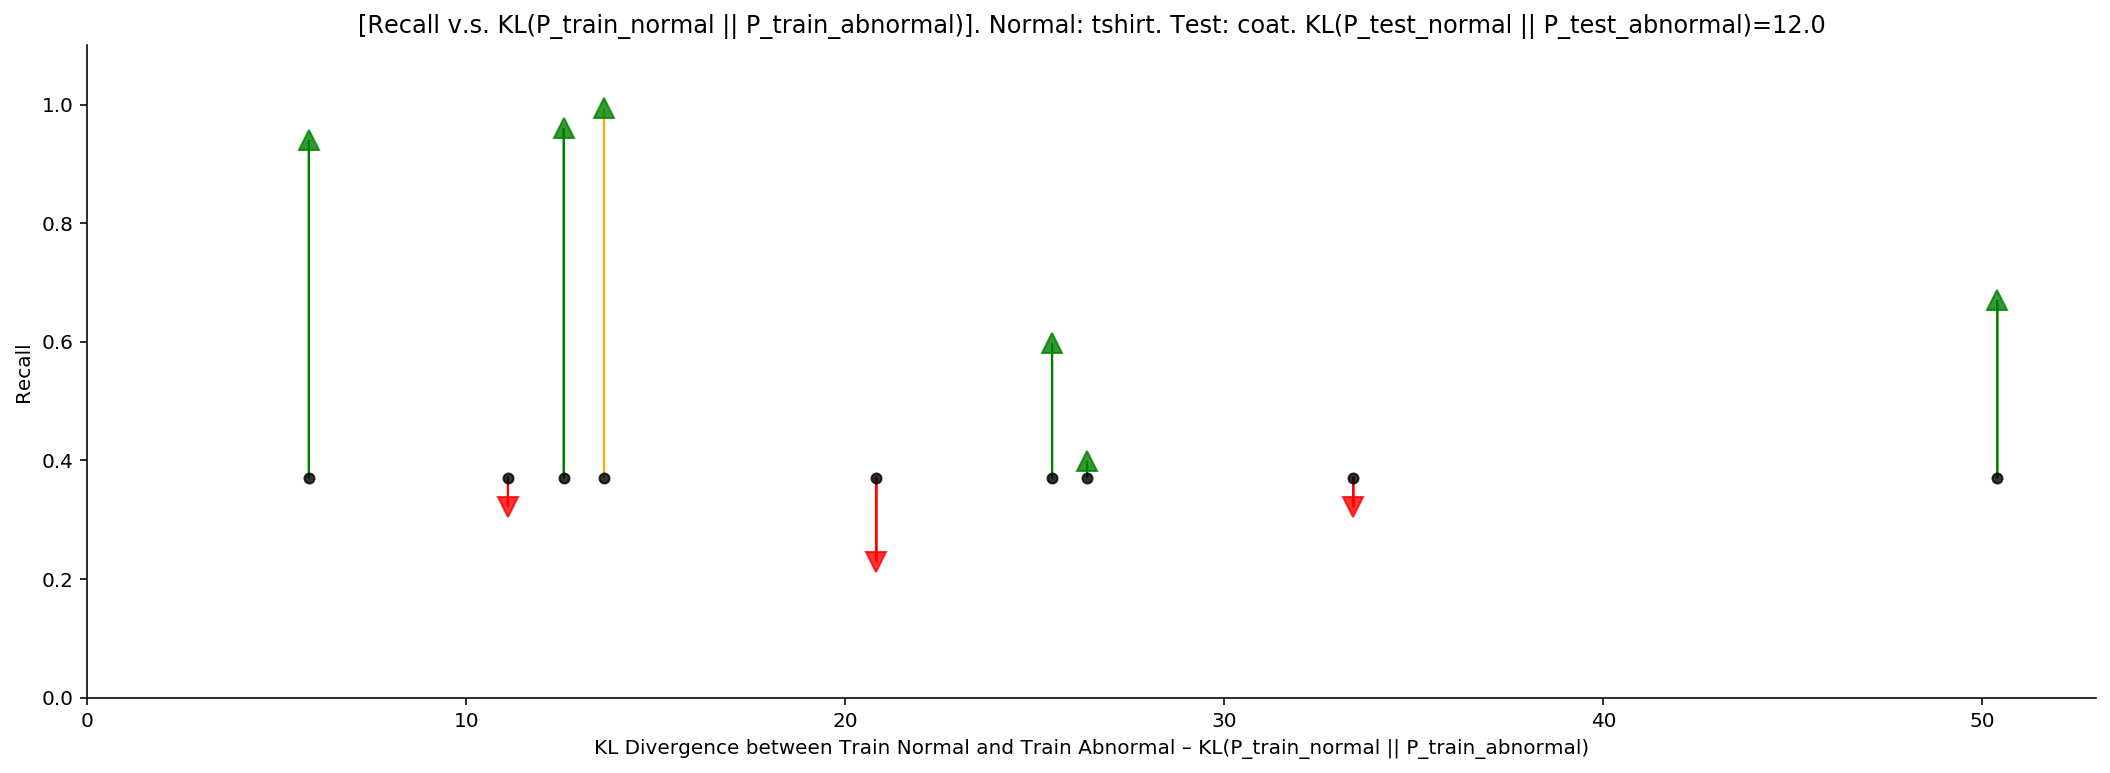

In [56]:
i = 4
y0 = np.array(y_un[i])
y1 = np.array(y_semi[i])
margin_x = np.array(x_margin[i])

dy = y1 - y0
pos_ind = np.where(dy >= 0)[0]
nega_ind = np.where(dy < 0)[0]

plt.figure(figsize=(18, 6))
plt.plot(margin_x[pos_ind], y0[pos_ind], '.', color='black', markersize=10, alpha=0.8)
plt.plot(margin_x[nega_ind], y0[nega_ind], '.', color='black', markersize=10, alpha=0.8)
plt.plot(margin_x[pos_ind], y1[pos_ind], '^', color='green', markersize=10, alpha=0.8)
plt.plot(margin_x[nega_ind], y1[nega_ind], 'v', color='red', markersize=10, alpha=0.8)


for j in range(len(y0)):
    # The follow line only works when normal = 0
    if i == j + 1:
        plt.arrow(margin_x[j], y0[j], 0, y1[j] - y0[j],
              width=0.001, length_includes_head=True, head_length=0.01, color='orange')  
    elif y0[j]-y1[j] >= 0:
        plt.arrow(margin_x[j], y0[j], 0, y1[j] - y0[j],
              width=0.001, length_includes_head=True, head_length=0.01, color='red')
    else:
        plt.arrow(margin_x[j], y0[j], 0, y1[j]-y0[j],
              width=0.001, length_includes_head=True, head_length=0.01, color='green')

sns.despine()
plt.ylabel('Recall')
plt.xlabel('KL Divergence between Train Normal and Train Abnormal – KL(P_train_normal || P_train_abnormal)')
plt.title('[Recall v.s. KL(P_train_normal || P_train_abnormal)]. Normal: tshirt. Test: {}. KL(P_test_normal || P_test_abnormal)={}'.format(name_list[i], round(margin_test_for_tshirt[i], 1)))
plt.ylim(0, 1.1)
plt.xlim(0, 53)
plt.show()

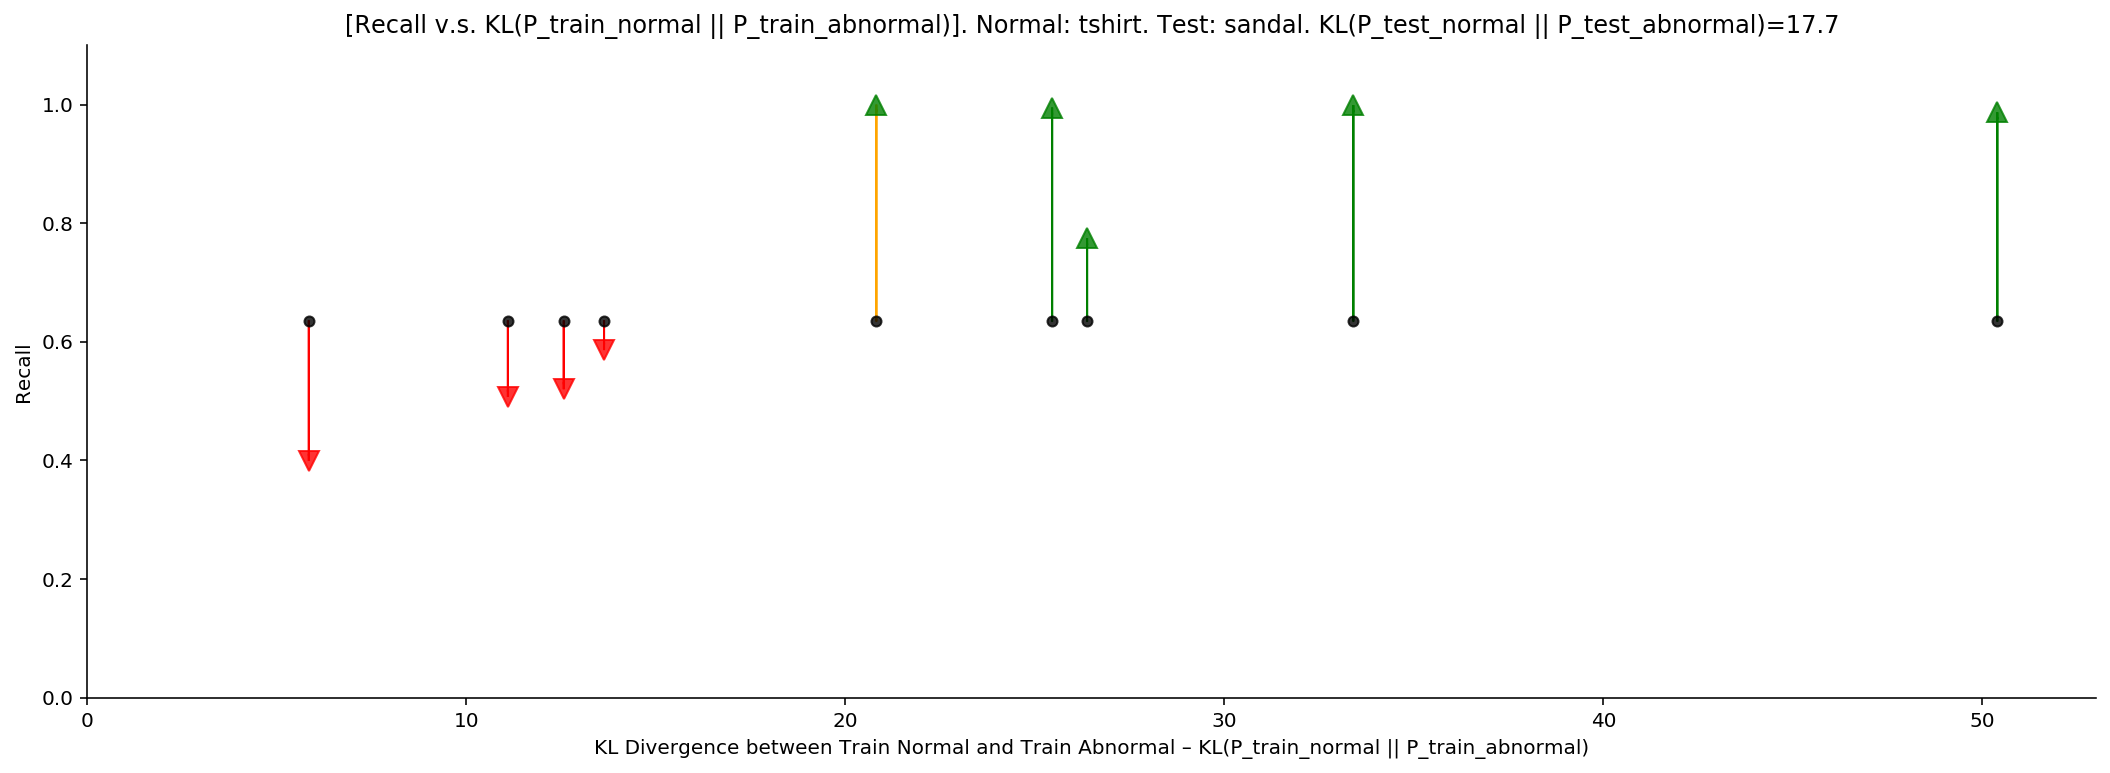

In [85]:
i = 5
y0 = np.array(y_un[i])
y1 = np.array(y_semi[i])
margin_x = np.array(x_margin[i])

dy = y1 - y0
pos_ind = np.where(dy >= 0)[0]
nega_ind = np.where(dy < 0)[0]

plt.figure(figsize=(18, 6))
plt.plot(margin_x[pos_ind], y0[pos_ind], '.', color='black', markersize=10, alpha=0.8)
plt.plot(margin_x[nega_ind], y0[nega_ind], '.', color='black', markersize=10, alpha=0.8)
plt.plot(margin_x[pos_ind], y1[pos_ind], '^', color='green', markersize=10, alpha=0.8)
plt.plot(margin_x[nega_ind], y1[nega_ind], 'v', color='red', markersize=10, alpha=0.8)


for j in range(len(y0)):
    # The follow line only works when normal = 0
    if i == j + 1:
        plt.arrow(margin_x[j], y0[j], 0, y1[j] - y0[j],
              width=0.001, length_includes_head=True, head_length=0.01, color='orange')  
    elif y0[j]-y1[j] >= 0:
        plt.arrow(margin_x[j], y0[j], 0, y1[j] - y0[j],
              width=0.001, length_includes_head=True, head_length=0.01, color='red')
    else:
        plt.arrow(margin_x[j], y0[j], 0, y1[j]-y0[j],
              width=0.001, length_includes_head=True, head_length=0.01, color='green')

sns.despine()
plt.ylabel('Recall')
plt.xlabel('KL Divergence between Train Normal and Train Abnormal – KL(P_train_normal || P_train_abnormal)')
plt.title('[Recall v.s. KL(P_train_normal || P_train_abnormal)]. Normal: tshirt. Test: {}. KL(P_test_normal || P_test_abnormal)={}'.format(name_list[i], round(margin_test_for_tshirt[i], 1)))
plt.ylim(0, 1.1)
plt.xlim(0, 53)
plt.show()

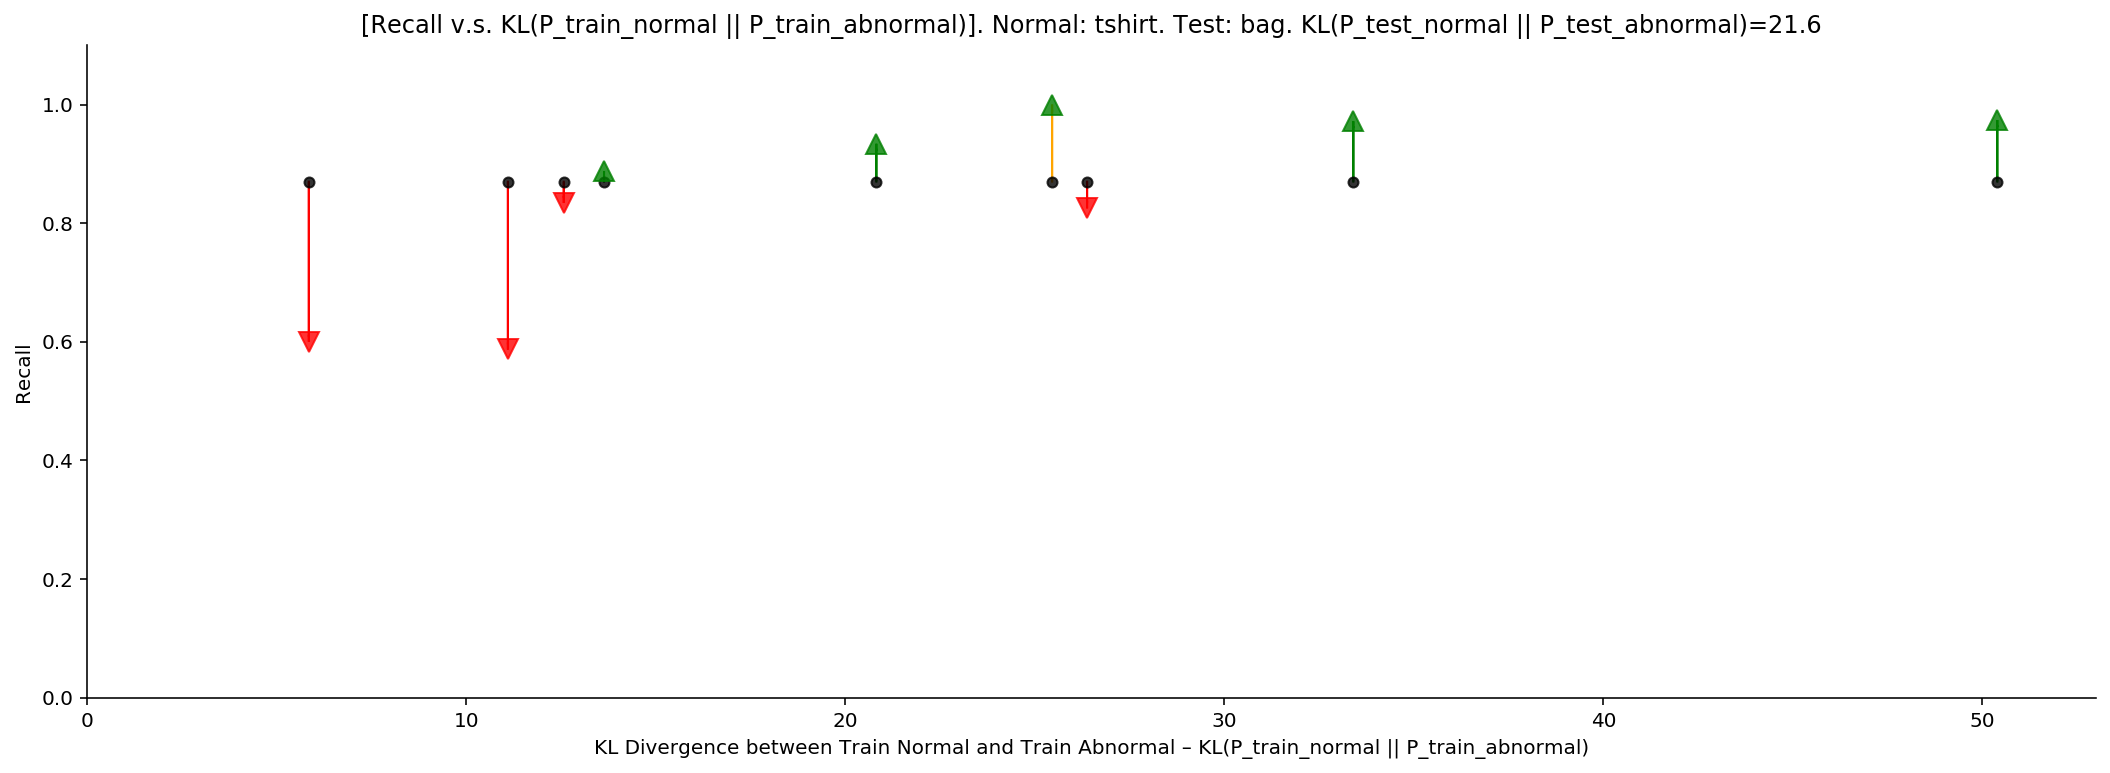

In [57]:
i = 8
y0 = np.array(y_un[i])
y1 = np.array(y_semi[i])
margin_x = np.array(x_margin[i])

dy = y1 - y0
pos_ind = np.where(dy >= 0)[0]
nega_ind = np.where(dy < 0)[0]

plt.figure(figsize=(18, 6))
plt.plot(margin_x[pos_ind], y0[pos_ind], '.', color='black', markersize=10, alpha=0.8)
plt.plot(margin_x[nega_ind], y0[nega_ind], '.', color='black', markersize=10, alpha=0.8)
plt.plot(margin_x[pos_ind], y1[pos_ind], '^', color='green', markersize=10, alpha=0.8)
plt.plot(margin_x[nega_ind], y1[nega_ind], 'v', color='red', markersize=10, alpha=0.8)


for j in range(len(y0)):
    # The follow line only works when normal = 0
    if i == j + 1:
        plt.arrow(margin_x[j], y0[j], 0, y1[j] - y0[j],
              width=0.001, length_includes_head=True, head_length=0.01, color='orange')  
    elif y0[j]-y1[j] >= 0:
        plt.arrow(margin_x[j], y0[j], 0, y1[j] - y0[j],
              width=0.001, length_includes_head=True, head_length=0.01, color='red')
    else:
        plt.arrow(margin_x[j], y0[j], 0, y1[j]-y0[j],
              width=0.001, length_includes_head=True, head_length=0.01, color='green')

sns.despine()
plt.ylabel('Recall')
plt.xlabel('KL Divergence between Train Normal and Train Abnormal – KL(P_train_normal || P_train_abnormal)')
plt.title('[Recall v.s. KL(P_train_normal || P_train_abnormal)]. Normal: tshirt. Test: {}. KL(P_test_normal || P_test_abnormal)={}'.format(name_list[i], round(margin_test_for_tshirt[i], 1)))
plt.ylim(0, 1.1)
plt.xlim(0, 53)
plt.show()

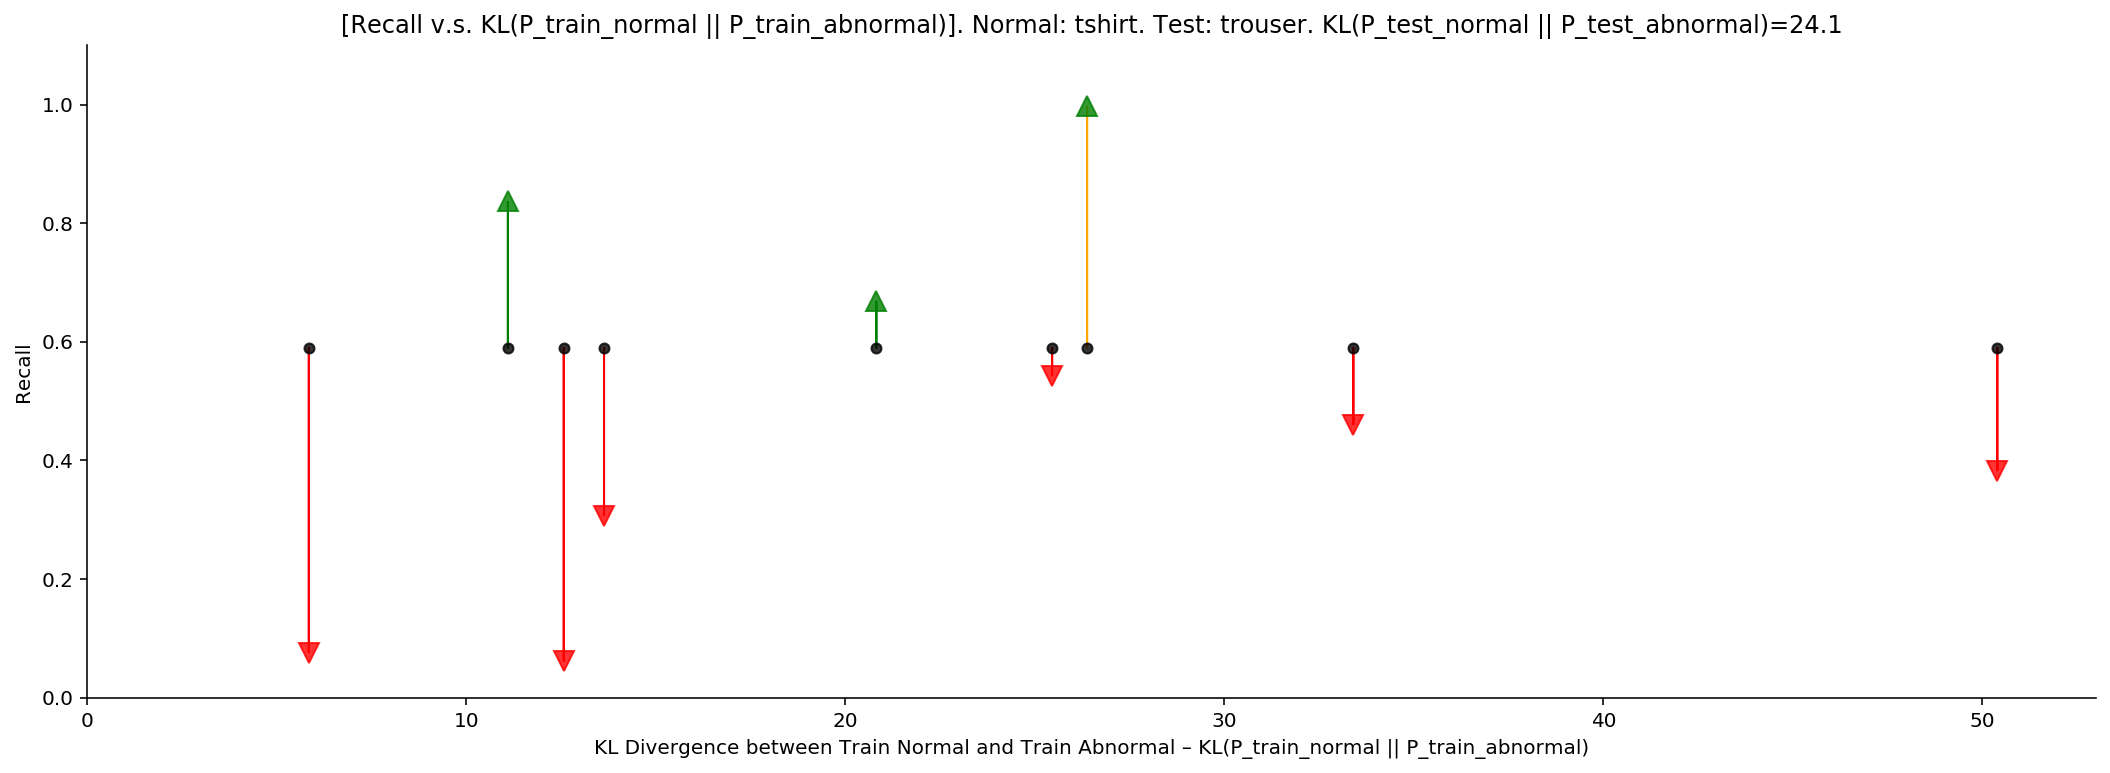

In [58]:
i = 1
y0 = np.array(y_un[i])
y1 = np.array(y_semi[i])
margin_x = np.array(x_margin[i])

dy = y1 - y0
pos_ind = np.where(dy >= 0)[0]
nega_ind = np.where(dy < 0)[0]

plt.figure(figsize=(18, 6))
plt.plot(margin_x[pos_ind], y0[pos_ind], '.', color='black', markersize=10, alpha=0.8)
plt.plot(margin_x[nega_ind], y0[nega_ind], '.', color='black', markersize=10, alpha=0.8)
plt.plot(margin_x[pos_ind], y1[pos_ind], '^', color='green', markersize=10, alpha=0.8)
plt.plot(margin_x[nega_ind], y1[nega_ind], 'v', color='red', markersize=10, alpha=0.8)


for j in range(len(y0)):
    # The follow line only works when normal = 0
    if i == j + 1:
        plt.arrow(margin_x[j], y0[j], 0, y1[j] - y0[j],
              width=0.001, length_includes_head=True, head_length=0.01, color='orange')  
    elif y0[j]-y1[j] >= 0:
        plt.arrow(margin_x[j], y0[j], 0, y1[j] - y0[j],
              width=0.001, length_includes_head=True, head_length=0.01, color='red')
    else:
        plt.arrow(margin_x[j], y0[j], 0, y1[j]-y0[j],
              width=0.001, length_includes_head=True, head_length=0.01, color='green')

sns.despine()
plt.ylabel('Recall')
plt.xlabel('KL Divergence between Train Normal and Train Abnormal – KL(P_train_normal || P_train_abnormal)')
plt.title('[Recall v.s. KL(P_train_normal || P_train_abnormal)]. Normal: tshirt. Test: {}. KL(P_test_normal || P_test_abnormal)={}'.format(name_list[i], round(margin_test_for_tshirt[i], 1)))
plt.ylim(0, 1.1)
plt.xlim(0, 53)
plt.show()

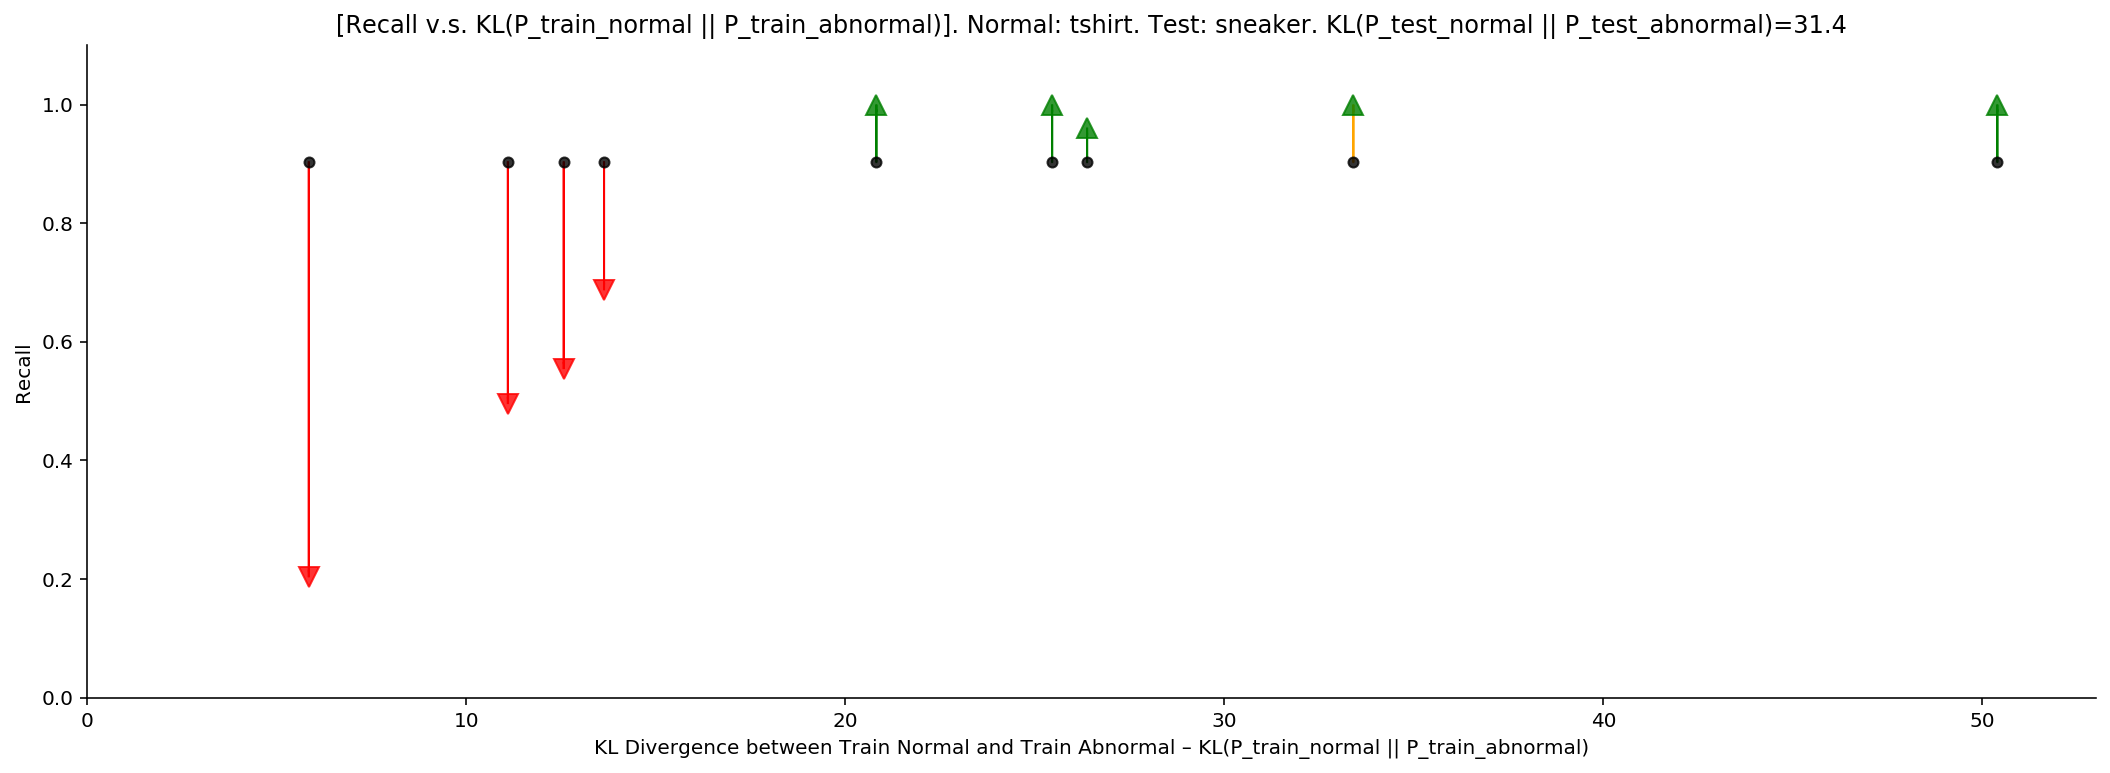

In [86]:
i = 7
y0 = np.array(y_un[i])
y1 = np.array(y_semi[i])
margin_x = np.array(x_margin[i])

dy = y1 - y0
pos_ind = np.where(dy >= 0)[0]
nega_ind = np.where(dy < 0)[0]

plt.figure(figsize=(18, 6))
plt.plot(margin_x[pos_ind], y0[pos_ind], '.', color='black', markersize=10, alpha=0.8)
plt.plot(margin_x[nega_ind], y0[nega_ind], '.', color='black', markersize=10, alpha=0.8)
plt.plot(margin_x[pos_ind], y1[pos_ind], '^', color='green', markersize=10, alpha=0.8)
plt.plot(margin_x[nega_ind], y1[nega_ind], 'v', color='red', markersize=10, alpha=0.8)


for j in range(len(y0)):
    # The follow line only works when normal = 0
    if i == j + 1:
        plt.arrow(margin_x[j], y0[j], 0, y1[j] - y0[j],
              width=0.001, length_includes_head=True, head_length=0.01, color='orange')  
    elif y0[j]-y1[j] >= 0:
        plt.arrow(margin_x[j], y0[j], 0, y1[j] - y0[j],
              width=0.001, length_includes_head=True, head_length=0.01, color='red')
    else:
        plt.arrow(margin_x[j], y0[j], 0, y1[j]-y0[j],
              width=0.001, length_includes_head=True, head_length=0.01, color='green')

sns.despine()
plt.ylabel('Recall')
plt.xlabel('KL Divergence between Train Normal and Train Abnormal – KL(P_train_normal || P_train_abnormal)')
plt.title('[Recall v.s. KL(P_train_normal || P_train_abnormal)]. Normal: tshirt. Test: {}. KL(P_test_normal || P_test_abnormal)={}'.format(name_list[i], round(margin_test_for_tshirt[i], 1)))
plt.ylim(0, 1.1)
plt.xlim(0, 53)
plt.show()

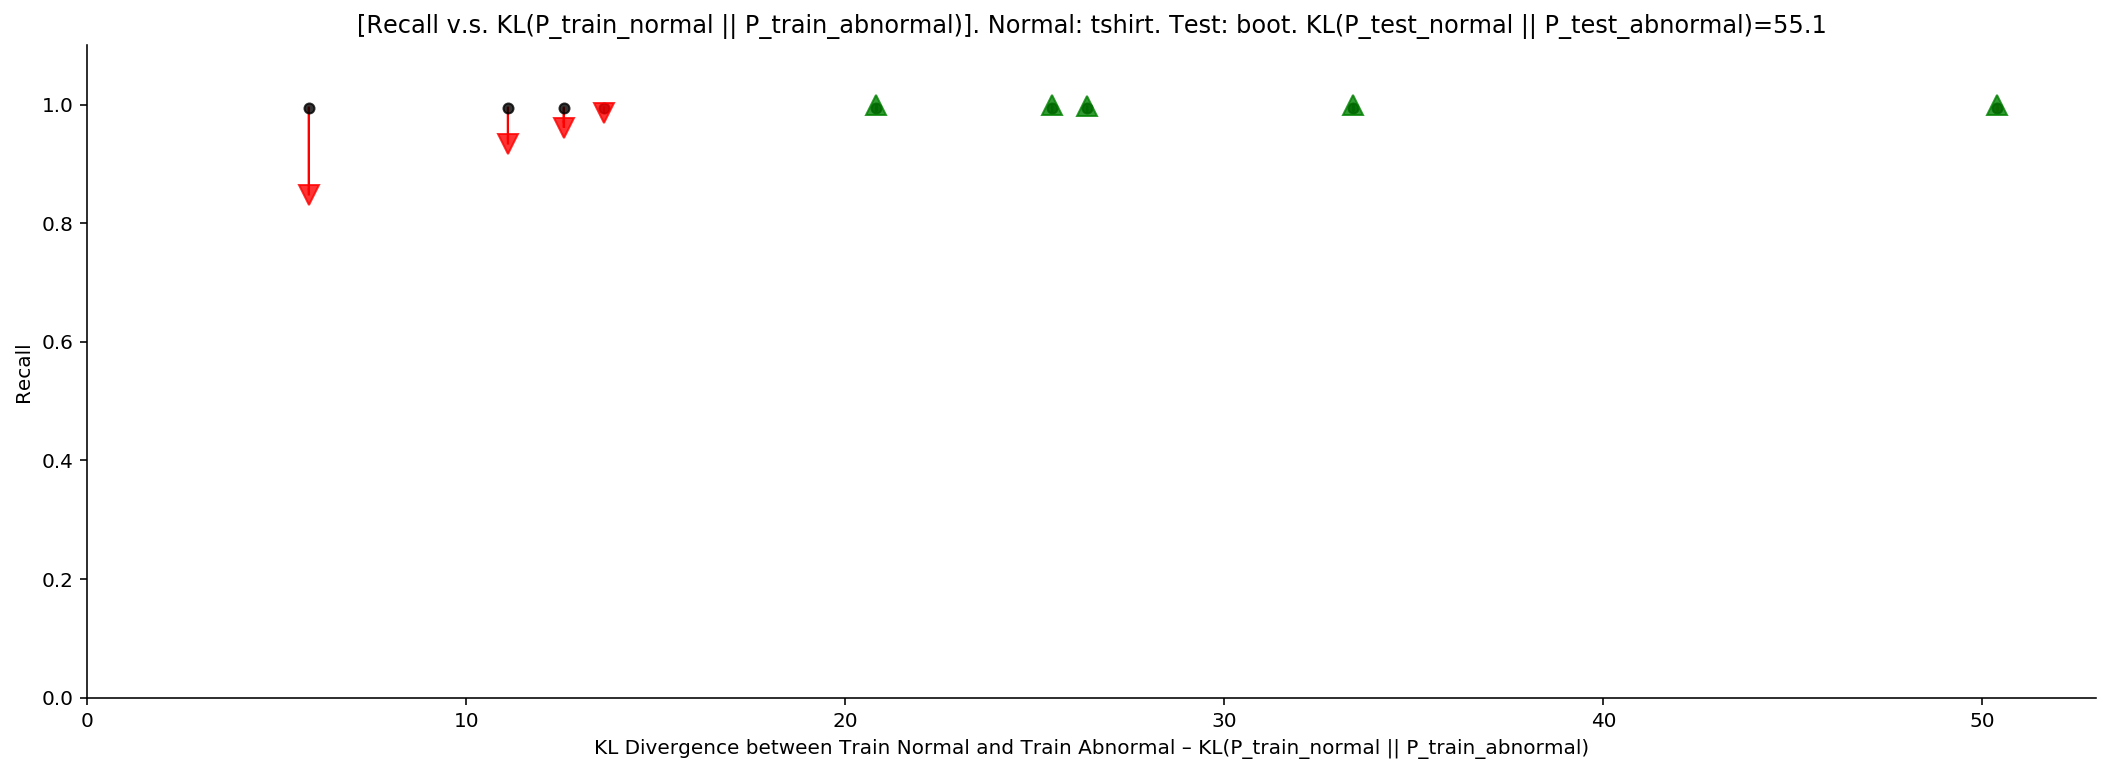

In [60]:
i = 9
y0 = np.array(y_un[i])
y1 = np.array(y_semi[i])
margin_x = np.array(x_margin[i])

dy = y1 - y0
pos_ind = np.where(dy >= 0)[0]
nega_ind = np.where(dy < 0)[0]

plt.figure(figsize=(18, 6))
plt.plot(margin_x[pos_ind], y0[pos_ind], '.', color='black', markersize=10, alpha=0.8)
plt.plot(margin_x[nega_ind], y0[nega_ind], '.', color='black', markersize=10, alpha=0.8)
plt.plot(margin_x[pos_ind], y1[pos_ind], '^', color='green', markersize=10, alpha=0.8)
plt.plot(margin_x[nega_ind], y1[nega_ind], 'v', color='red', markersize=10, alpha=0.8)


for j in range(len(y0)):
    # The follow line only works when normal = 0
    if i == j + 1:
        plt.arrow(margin_x[j], y0[j], 0, y1[j] - y0[j],
              width=0.001, length_includes_head=True, head_length=0.01, color='orange')  
    elif y0[j]-y1[j] >= 0:
        plt.arrow(margin_x[j], y0[j], 0, y1[j] - y0[j],
              width=0.001, length_includes_head=True, head_length=0.01, color='red')
    else:
        plt.arrow(margin_x[j], y0[j], 0, y1[j]-y0[j],
              width=0.001, length_includes_head=True, head_length=0.01, color='green')

sns.despine()
plt.ylabel('Recall')
plt.xlabel('KL Divergence between Train Normal and Train Abnormal – KL(P_train_normal || P_train_abnormal)')
plt.title('[Recall v.s. KL(P_train_normal || P_train_abnormal)]. Normal: tshirt. Test: {}. KL(P_test_normal || P_test_abnormal)={}'.format(name_list[i], round(margin_test_for_tshirt[i], 1)))
plt.ylim(0, 1.1)
plt.xlim(0, 53)
plt.show()